In [1]:
import subprocess
import shlex
import re

import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import combine_pvalues
from IPython.display import display, Markdown
from tqdm import tqdm

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

def show():
    plt.savefig(f"ent.{show.fig_counter}.pdf", dpi='figure', transparent=True, bbox_inches='tight')
    show.fig_counter += 1
    show.plt_show()

show.fig_counter = 0
show.plt_show = plt.show

plt.show = show

In [3]:
RANDOMNESS_PATTERN = re.compile(r"exceed this value (\d+\.\d+) percent")

CC_PATTERN = re.compile(r"(?<!^)(?=[A-Z])")

# ENT - pseudorandom number sequence test

In [4]:
def test_randomness_ent(
    mode, seeds=[42], limit='1GB',
):
    outputs = []
    
    for seed in tqdm(seeds):
        generator = subprocess.Popen(shlex.split(
            f"cargo run --release --quiet -- --seed {seed} --limit {limit} {CC_PATTERN.sub('-', mode).lower()}"
        ), stdout=subprocess.PIPE)
        ent = subprocess.run(
            shlex.split("./ent"), stdin=generator.stdout,
            check=True, capture_output=True, text=True
        )

        match = RANDOMNESS_PATTERN.search(ent.stdout)
        
        if match is not None:
            pvalue = float(RANDOMNESS_PATTERN.search(ent.stdout).group(1)) / 100.0

            outputs.append((pvalue, ent.stdout))
    
    gof_statistic, gof_pvalue = combine_pvalues([pvalue for pvalue, output in outputs])

    if gof_pvalue <= 0.01 or gof_pvalue >= 0.99:
        display(Markdown(f"## <span style='color:purple'><u>{mode}</u></span>"))
    elif gof_pvalue <= 0.05 or gof_pvalue >= 0.95:
        display(Markdown(f"## <span style='color:red'><u>{mode}</u></span>"))
    elif gof_pvalue <= 0.1 or gof_pvalue >= 0.9:
        display(Markdown(f"## <span style='color:orange'>*{mode}*</span>"))
    else:
        display(Markdown(f"## <span style='color:green'>{mode}</span>"))
        
    most_suspect = None
    
    for (pvalue, output) in outputs:
        suspicion = 1 - min(pvalue, 1 - pvalue)
        
        if (most_suspect is None) or (suspicion > most_suspect[0]):
            most_suspect = (suspicion, output)
        
    display(Markdown("#### Fisher’s combined Chi-squared:"))
    display(Markdown(f"* p-value: {gof_pvalue}\n* statistic: {gof_statistic}"))
    
    plt.title("Distribution of p-values")
    plt.xlabel("p")
    plt.ylabel("pdf")
    plt.hist([pvalue for pvalue, output in outputs], density=True)
    plt.show()

    display(Markdown("#### Test output (most suspect):"))
    display(Markdown(">" + most_suspect[1].replace('\n', '\n>')))

    display(Markdown("#### Parameters:"))
    display(Markdown(f"* seeds: {seeds}\n* limit: {limit}"))

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:39<00:00,  2.50it/s]


## <span style='color:green'>Monolithic</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.5239546108393878
* statistic: 1995.53663443052

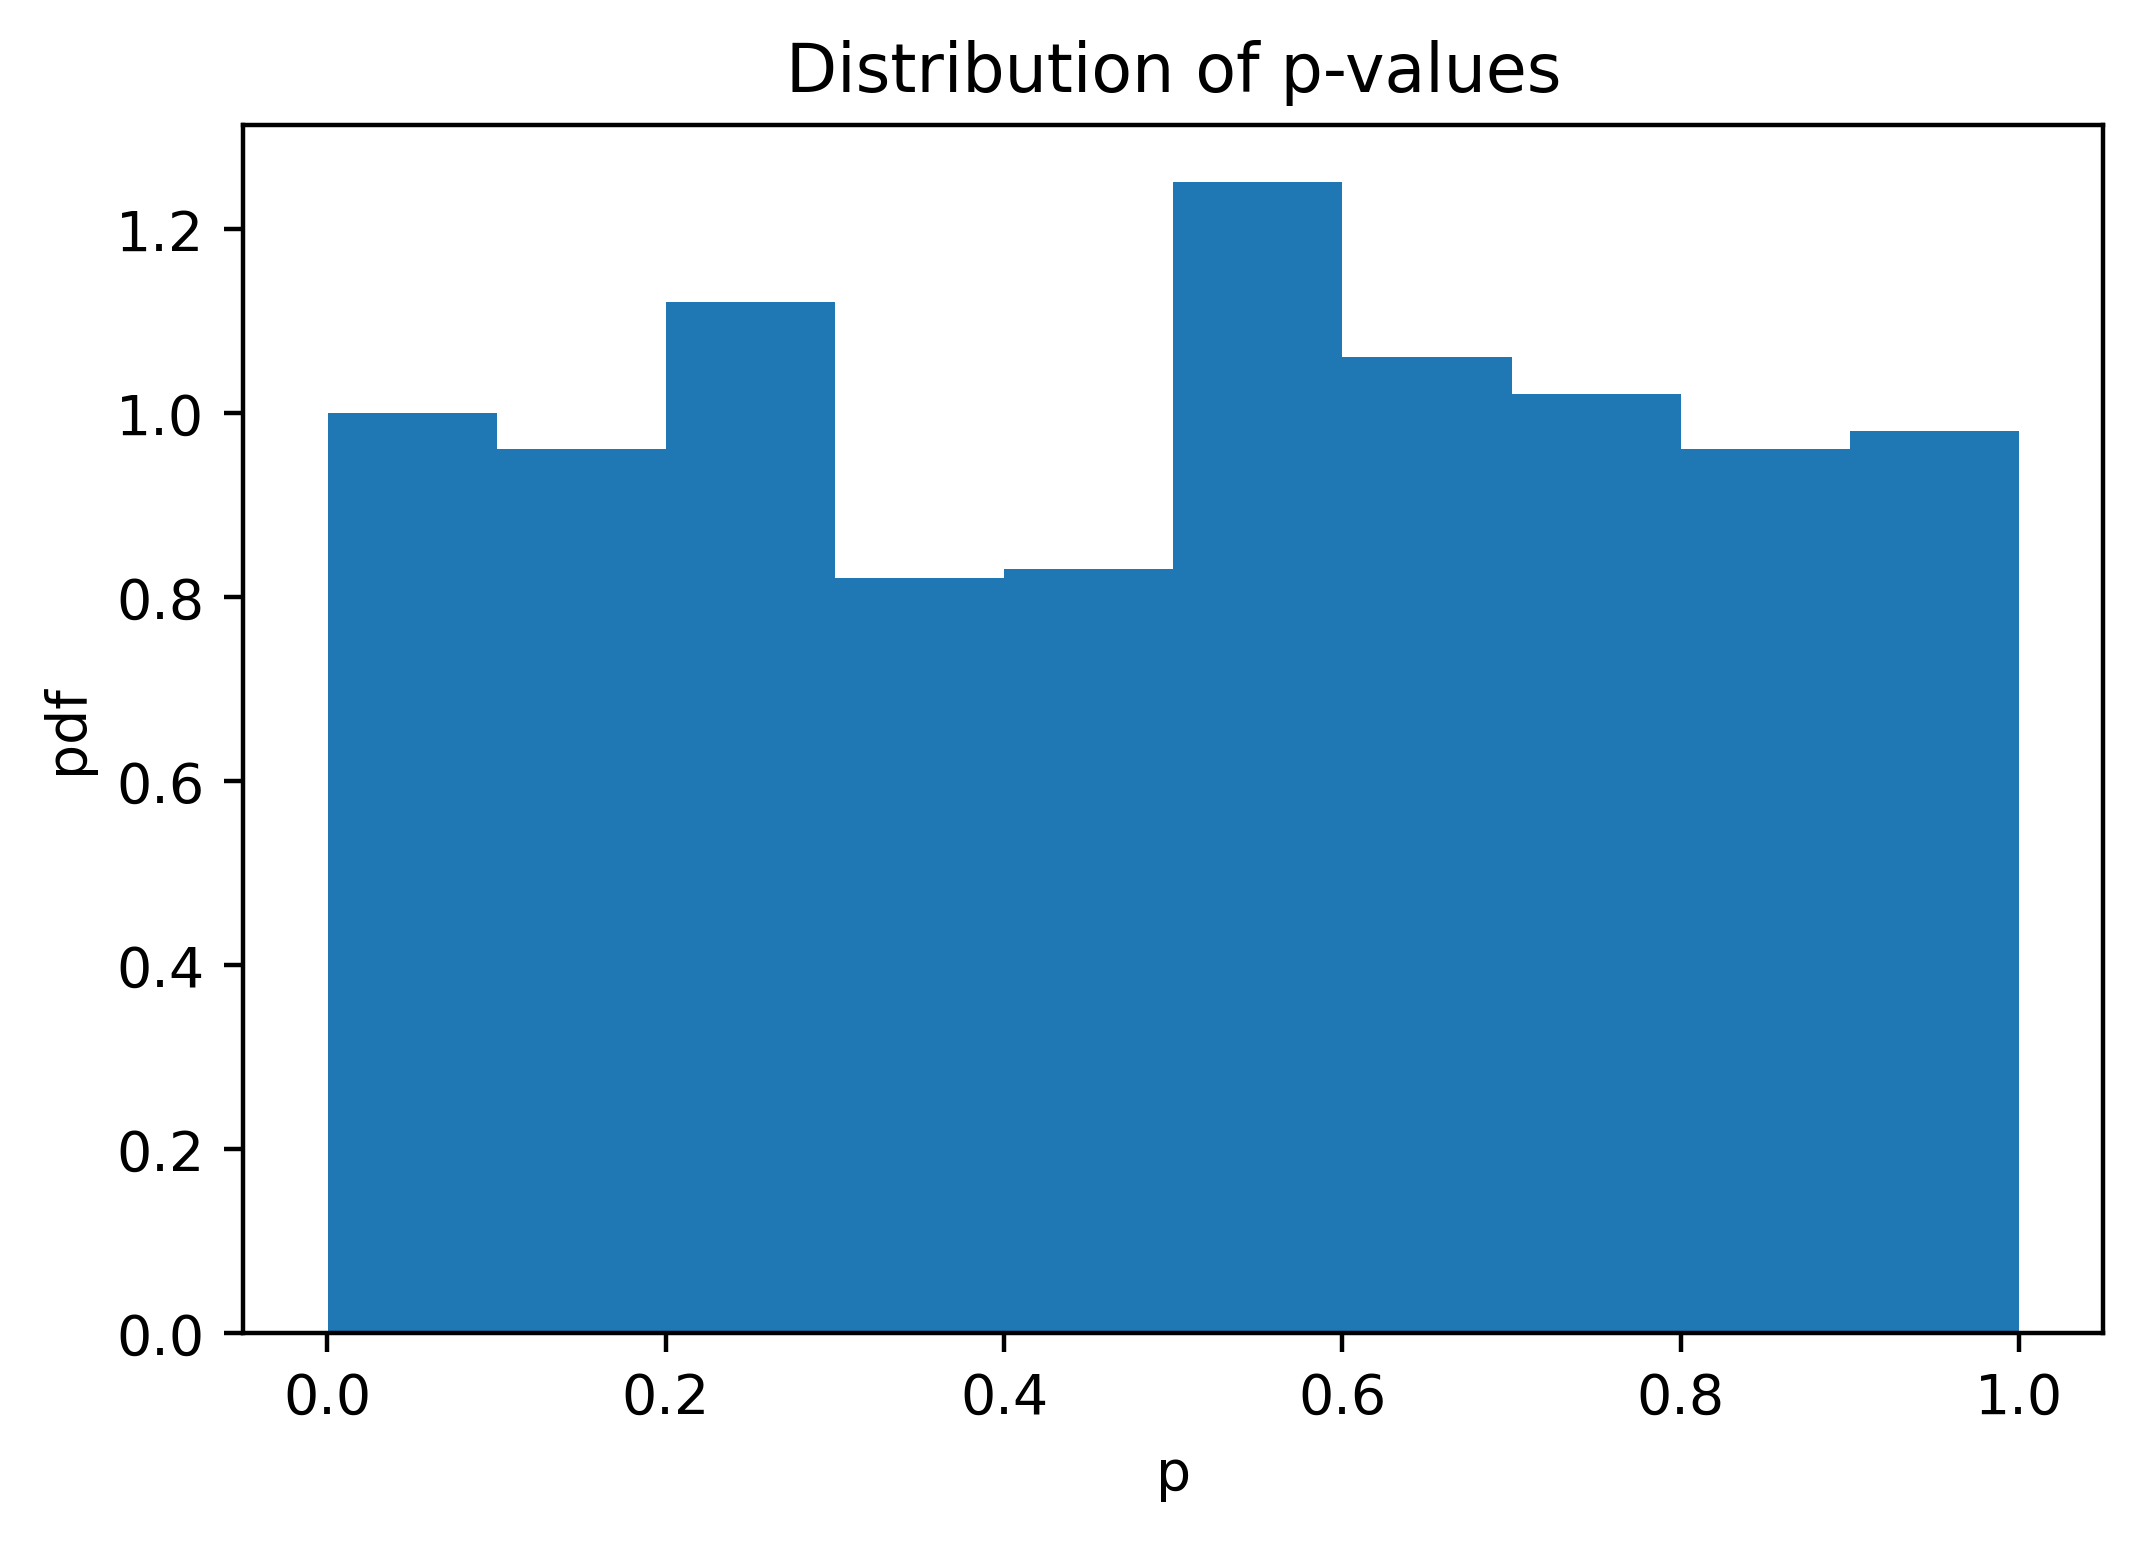

#### Test output (most suspect):

>Entropy = 7.999987 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 185.30, and randomly
>would exceed this value 99.97 percent of the times.
>
>Arithmetic mean value of data bytes is 127.5075 (127.5 = random).
>Monte Carlo value for Pi is 3.138126055 (error 0.11 percent).
>Serial correlation coefficient is -0.000066 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [ 4424393327323622352  2365507274260060772  2514287240298740161
   293530795735131719  7300164724190594816 10069015800024553188
 15482745295188578274  9660158893949146890 15737398056258841033
 14097941957417776137 11239069059483141210 16855541857178849460
  5229313175667633821  7633616765478840599 14655473941008769307
 15943327125134747134   261130920603509089 12415472942050145719
 13138461820021977438  5737738944068573590 10715188501581765290
  9803433101159033564  6354598786930053792 14227083323482553370
  9809621797220687127  5321455829422223640  6322878394504585007
  8243052273684046736  9333653474782036318  5540624091497113814
 18152324540559716772  8094443570162659780  4601077420478352927
  3189363643783741198 16877228983549920903 13393351021654284778
  4040892349003891484  1827213346323482696 16181621776752432405
 10329423305559276345  6331635502512498951  9338106659012158185
  9586184467700609845 16481123769992978938  6958141317124118284
  2240777044261830575 13438206368562676888 11368825402873125783
 10207636282134498363 10148697608511837659 13042821774530138288
  2808735018565712716 16171304026126810817  2012260278721510080
  7450693837471703274 15497389272452553058 12781572870159144161
 13996473595961043661 10068989911942529033   996716187549126216
   651509373999704433  6640289706475451811  4279464964928217961
 17392533878329357782  7191067218938860615 14094316537438010193
 16924230788477089203 11493026292829016347  2378916166478017302
  6880209199515115614  6349277900219142153  8706701397832373298
  5750654423014878204 16265526656814378487  8518712158507705752
  2781602740977013709 11842615040454365494 11905390421916869235
  6834631432482518077 16575723385946547368  2458735494137903202
   223035813055490983 12286373870222988415  7005162638637089886
 18398293632305411534 10760824222348168111  6471676431845671560
   920752312802953252 10049843979986776738 15115247733551265088
 15753368394934038228 17509930710418743125  9963624579453144832
 16591472256089881358 18186767202258680582  9310440026536999924
  2835392555837462660  3471832157503149102  5434521343684116954
  7811809186136985565  4466226920052346405 13116629976596486367
 12298086675565693781 16656862110007767325 14464820524491576514
  6179276008966794269 17639285660354252547  9282389327810376575
 15225305267586855790  8342779124823958862  8002783182238293155
 18239678535232121149 13137742008307629424  2426308404217804767
  4736966578478383429 12055671160696471508 13011095689729779408
  9838999308704278565 14015703646614207078 16901189105734012572
  1323377651187445397 18189578129207498325 17410885914386141029
 16218637378748195166 15408718648747045103   181756076422003288
  2330404858055701017  5568116319654112564   688139359905458021
 17719798096717863176  7720889214599867085 11929571027636569325
  9671407053869583782  6978432476068881000 10280636761402867659
  6327881423113469053  6606597834222731721  7115784160733778612
 10670314425206355491  1388807005626908068 12076104168280215667
  4752331723759642551  7678469794310250284   697797874808207366
  1721319107390078152  8230951754820332551  9099326346364523542
 16560043479523914803  8520146364389285252  7209576962811080827
 11088207981155766974 17538013911422456994   941577286799555040
  2544669179468195914  1694429284867240949 15522268022347636117
  9881335234808625087 18198653661390973339 17166447304036723868
  1686547227985486623 14380507351361720579 17276447424163882640
 11447767534402424193 16370162678550816908  9913875961856154645
   125085271417046815  3578662335927756086 17630345759173353473
  6232888238603490886 13081712669739293237 17328665138334543361
  8549389294595239073 16175015597569366734 14670138553452513372
  5690267623173651396 15663378136085806023 10283241206824140358
 12563917841053017464 12165292172996610173   460208290736182697
  6355853847784667608 11894095497065491347  6542007667330720697
  8669455375522637639  7013721961117892330 15864680767788247298
  7290060889916014332  5737912877875312452 14483642518044068236
  3835124101262941393 12024610155264472840  6040440116336763298
 16365026627693666596  2976385025630546131 18185500536656058676
 15350701660853757856  4507164490091632513 14315787130107257126
 13257455817983820532 12740721307542227828  4393585923592181119
  2409157623471305283  4503935942802409408 12142493849556085622
  7185319667279821858 11698923027814161829 13736952214406699376
  2654066320800843920  8741563491613812801  1925709380921958147
  9402705480271972389  6898777495465400825  3527669338520259572
  8142591390691931842  3246960551420920476 16075698194116451935
  2787743163416420103 18442288227707241012  2991863817541071139
  4937139307835676242 14116616655387835053 17420857822369476043
  8785235656519621949 15820169021816267245  3837666717124601059
 13896225441837730101 10944252646924552767 10490782374512004184
 16035998456358441128 17238509694909476681 15344791633681718608
  9446159476480729590 11662001129847482974  3580234489902237807
   575713309702314540  7794357417896484466  4636585964243159191
  6641786986222814486  6090693860473118494  5773330873790557035
 17868577201879518948 13564923960687994811 11850544939667211394
 13371610780258000749 15999706267064366518 15936798580422322173
  7825429735127621874   300431968068403611  3375779792505134056
  3737823504573821665 17958089727511149755 12419218422308038213
  4912961267805552652 14907428598248563159 15456961239188493274
 13149696969478439139 10443463441215004695 12998868642918482931
 15461658501301930707  3094710273370272666 13671365165942386456
 12745424205702436636 11416304826875464899  4462948882172250502
 12340009229584725342  4682453474154186337  8256836701890723890
  4777476134355315393 12466469431322239871 15707918511993797649
 16976000638581122764  9795978794589883735  9482147162964222759
 11564160697151787216  3000012544756942973  6425075426130903788
 10884146569556822032 13442542790367009956  4244790076750098946
  7934573043058902683 17789200048418909109 11175645551379406905
 13925460511705046889 17605083320916793448  5101967091138496317
 12377926848543624305  4758897734342932327  9905010999623131885
 13496776796507556770 14956828237339416432 16281020960727871262
 16931625774085956843 14803840883047874406  4881141918622697850
  8989429678954538150 15562493435793912822  7685880217680171819
 16629830857845349037  2325042926001014011  4299595379330140975
  8168192709563144832 11531121430809251178  4849771414807096270
  7159891878134614478 12692542547513939466 11852322105516985232
   406545084197910081 15564406425790718790 18173624087448064366
  8454889554827321189  8432725066936856090 18289785222289216587
 16702592658602842054  9437884115953533159  8803585415412316431
 16964045279071342420 12452642243503516548 18345858263703667290
  3745780906158702647  4785688571911033327 11873408831083595685
  7816653388899781962 11606653898649506898 10977558911451850181
 10508995832376690619   473353286485217140 14534323149020612499
  4755028679872535148  4302266193888196101  4878711140159695373
  1839441150318322183  2395384634239088359  5303525039464071928
  1466316525082784306  6716573088478697833 14048047242208914248
 16049641239052498571 15247917494869294038  1068222748033598878
 11873465743863454213  4863784056156791479  7090617940457118143
  3157427438366717513   266957799359225415  9704162625990765739
 11603206459248225381 11917681645090879116 14634916349955883573
 11044793125172677733 16439666213316967262 15503810967336044198
  1764978583298783365  3359422965082955554 11687340190642841267
  6785319366595809992 10674866221797376525 17478201050433284529
  3630969658246620911 16977908671416389675  5131366639390608501
   314249575642333564 12510687980832197941  1559444107204506635
 14630133272101953036 11233229124245864624 13496276559367690298
 16603637745699313628 11544895369024533128 11271163860959132366
  7925184894620641554  7234876739653841715  1736128907951455870
 12805554001142772683 14205947763360826830  2274968763434593798
  4912896298029907135  1708383559633284364  4166761770447471120
  7344296585344484119 15514728533742156976 15545667093443360357
  7537184844267030366  6741202848865676159  1359995398293029552
  9014861323142422198  7835944438419307163  6426722490662602153
 18364423770974425819   976135732019941061  4480975968228597798
 10438127518677318755 15348873412162828550 10459119064801864057
 12844424507271586920 11161626476498276543 11187841245890703622
 16703665869699590497   531374036211047608 10514705202989667247
 16433646297605049669  3101350839653501037 12517196458272898934
 15640458701276132239 14385316333992056863 12987182970829656973
 17211086256568371306  5798421143142438664 10120664983205626133
  7026959845263529327 11448328505195549437  2744546061227022136
 12457462678559963994 16208626999461231428    82706160468233406
  3037566584867485168 12212547603957550560 18324596740952544512
  3298444256275543968  9673381132138463773 16185192272931727219
  7258727895241430545 16355463918620181194 16255461234658813552
 11809981187387813898 17618507408640803766  3837016968747288087
 13321990963246133134  6470112303289444227 16830427111629819434
 13499236565911123413  8436839983172117343  4951763877767244566
 10841807514886500856 15930823579904979448 18040275913124898623
 14051471557092352973 11485916689401584156  3308884653431142526
  4233635238037348892  6255204049529450575 14748685875412954786
  4997745754868205572 10282854518236550528 17363778803146683617
  2591578176804254108  8506945086102023037  9122319865743623841
  8724626211800082719  8100509458403160544   157162767031336451
 12744091981256551936 15769248335660264310   368202072290953143
 11670222617200443819 11113988021039059221  1715675629857631127
  4646600064202057883  4836622841663738979 15044459191128269146
 10852445415753498848  2858624305882479611 14648722051586038537
  7529335797647193328 15340519405930954528 15878357475698883107
 10770294987393573950 12814477444388727067 10167615447840014640
  2262824913692183734  8914108918218176160  4690530693622863393
  2078282905977005017  8433569105623672664 10675495114832988512
 17590615004583271876  9570717736948304061 16542381493364814652
  3907954540855660384  3294247374614767749 18080227858805000885
  7672452471780459346  5468559221014107643  4329564437253475278
 16340777914574187102 15634163275025349837 14770824402257896711
  1075426941774622970 11394164633732048627  8755918658050091759
 15752837609842846489 15050817500306196879 10637076975800935764
 17466170976636052692  8629882841709356951  1732389269593525803
  1241369249389256641 11463950662316004881 11758265025980957760
 10603725444250952336 16384633065607154586  8401774670668313866
 13958234246744305235   799958530512875171  4591169297908167719
  1456207408182253920  7129597856897226563  1758834810191493144
   967315009437418819 12437629688654954263  5375198778004237428
 14680373483009877678 13213661726640517475 12163686962443561735
 12929683766256289014 11202807093908532072  8032468550812789207
  7250201308054249599  9073528707155490106  7538413649639487330
  1141431289869077358  2953919611827411162 16687816924439084037
  7065313729942241771 13347894931488913386 16322035004212401189
 13617149961648123216 18088890738972056715 12927711407700010782
   561748911299464829  8140879932508304570  6189439594498764930
  7510934511622423873   287243980667267410 10130024588005479538
  9074448890016277763 16043878131133184864 14955365902345915226
  6246926201899604109 11871782720313837099  2892743590946108011
 12243723405096047788  6122423833505372917 16138163255998878702
  9530721626896493617  3232477481596434038  9399550500806919674
  6440071256874060997  7669759018322632281 17339422624011736910
  1278182153251658688 10648675448049018565  4920277270996417649
  6577381328698821863  3391793615496477289 18030156304377441338
  5355979036613127787  6099077883659078875 10062238484412279979
 12617320642264358343 17314527336161101481    11420429243628023
   520613943192798063  5293997055342822459 11116803016228622556
  1844948718187491486  7773818215790238663  6494017836927462851
 10603759257941208736 15683015546422181980  2509290789154274236
  9343823560311868241 17268790687745176025  7456022405311728632
  2584352997965116956 11457093753871397801 10081572947259792532
 15867475910121821592 11003701082608825905 10179095672908224041
  6696917475903136867  2129395770504549196 12864805595283538410
 18186506221788188143  4673314809865007620  2754506903388063410
 10135663340109909136  8953045028572943775  4650960904123336370
  8459701937981187844 12434867264617779850 13510131146126577233
 17060491828699686624  1756272469547606046 15871285732530347243
 10346816827119387846  6486458261938059519 18398685275636006017
 17449133739880536139  9155672723462014712  2695099721052239251
 14229016864487505623 17855643798799363405 10058182890604222790
  7872042707906762284  5641046330068892156  4698049478500829938
  3550854182942665463 18023592088320141406 11606949032378129829
  1596824000804150679 14433558452889807758  5834611134899281295
 17867788483056839761  1396122476829840687  5889050681951809036
  5315879207634700453 14588125392953956321  1689164556869106567
 12672823487137399716  7992498310964888947 12951341184992984801
  3828873558616327981  6380985602372996142 16096194496902867429
 15822499668158966336 14595002594864689279 14952282067154106290
 16086530462564194757  1863490087284026731 17035489820083584883
 16067735143996876475  7439553322811801015 14921389485044816178
  6433926348770449259  4994917571969183885 17782102914591717375
 15759484813195757991 10988853562229644129 15721674641053518173
  4645137252045106774  7722187802498595745  1934234318018998830
  6008695967443083027   564803915296414798   294786298317072658
  3026606091796764621 16790026452964059218 16680187308435775047
 15946187617209991689 14139613697444799326 11932891491985613614
  3495155070524634472 12741223833496842073 11104891022117795883
  3277684960397569744  2553827445120752096 17497628707435159634
 16931757545531785674 13650457336715547661  6555815503102201891
 17014411931923444125 10026095066524851281  3457557061077766875
 13703234325279092601 14123025866665489533 16581591272003144185
  3435053276943142230 10257544187311299129 11860188628805105928
  8337396322811904733  7211777198949600850  9171327504495336047
  6009603320302488279  1386395098805431636 13757796089736734049
 14556969278812400304  9250776808587672977 16902723871713669945
  8380161548009957305 16851383646473092036 15220866371300752186
  1124336352931568202 18065474549666675256 15235893476564753415
  1910272837739117019 13557882740284159989  9222016087676074820
 13262497784146983586 13406499877633669093  1278288592505138483
 17073610508091894951 16391806745696878225 10092460008267500457
 13192496093820445162 13799096832632295842 12334962765068074066
  2243124470457266235 17419997201696564178 15136941047803579122
  2735687942446444709   660304043351123645  5897350318047532954
  7378821093972209595 15412453300745529960  6912843195737785514
  6338101418818698516 13429322552888691295  6487831599485994430
  7121148501303713513 16092302736495759624 13623888051370745562
 11473816934327287295  5138302177752398721  1368162001238055569
 14643896004797911097 14798921154134104744  8972238156775498404
  7816720057147230071  3716980036946427485 11897409850407284638
 12967746168234293659 10306565098583890127  2841469764222356888
 17926476528959566413  1639284017087282373  1751574388966278039
   419338979279486713  1367141272913963179  8166357363709100360
  1653623892454242975 14722760898784247221  9364469008003187636
   738326229631865522  5162767615229907752   818614038903131541
 12252658409013377068 14559318978111882971  6315202483039476794
  4638274554564167964 11102693050436222139   162636618847445363
  2148656486132189095  8131532295539459192  2171466447384570814
  1426699063825548934  8292851508982506738  9735621102195276904
   318654096238589550 10484229851346864805 16793679958238658302
   145161330146978813  3504391264427725839   873904683444089125
  1077782223877221049  2055567412052193496  8754295332136123376
 11989517302247328733 17757452015294272748 17540185468946625013
  6076757766554403652  9391790398166518034 18324767677252841906
 17506062542419812512  7987038810739976803 18033260527901455338
 11904986503561012633 17617703678131895753 16265997556965544265
 14723041833050682072 11520365971166796857 16960667592435349835
 14282258174220314975 15830817287730435568 17974596383235641200
 10399712355956227276 18255141450556765035  5629370826181130275
  1561679177470688005   882144026478149448 14465940706775571298
 16979306421299019606  1663175137692017679 12158480235653715004
  6162951059600821336 16233585120990930338  4812793023692885893
  3408873436938936746  3211447020987477306 12584159576560918526
   104113747478315574 17476282605080011150  5128668338757877536
  1360526416372322724   975672920760471515  1323102657315059548
 11020342151569752553  1047086173133216095  2703771600061804897
  8981076389874243296  2374465482646931197 16789096233191231238
 10171568947846759699 18036858807121341088 10656889351009132645
  5788819594352315029 17390306788185598268 12289498113079834938
  7535183297755564044 15072667856784258420 17820528279146710957
  8129814166826271841  5397973904083541081   270632492813522060
 10108219637268601770  4017965894694357431 12958555744060429156
 12313563291530412089 15130435068826424044  8910801493424666727
 10349304914464294881 11734277451918292700 10169949805486578496
  4668643569916600948   739775112345623034  2920554116534147122
  2302504712209012166 17097472553608797040  7368579259003917008
  8876562978384391702  2101757008920659192 11200426073954398848
 18220213103602325642  8999670194246611235  6863202283864107518
 11606038323654277662 14560519710920604930 10135967804619658525
 15134471956560507962   248245403152243859 15557303929100965755
 16220816924358172234  1442926546826395406  8953873431690916141
 12264763073805357701 17639802413555988105 11313571465362318429
  8349510279249082787  4730197883854574037 17700350828226919559
  6060765592635526504  3433077205210452073  4839531353057339797
  9576421678408818596 17487920146599374059 14425389236304084421
 11663885462723285921 14251789584320769999  6743428455702637921
  2684726315299550844 17218514717444105744 11386049411916575028
 15147268814429345486  5991472120099197308 16899907114051973611
  1461194679962585501  6948492439074247635 16405023762029422766
  2628736803268315439  3320885899955626828  7818620475224893631
 15693698974552678243  3106531156321569465 15642140907588545808
 14562395973015546368  5617247015842712517 18258267165610005434
 10580373873994978004  2837078718937458768  8543627481498532447
  8093991981322426863  8177432007391395429   225776990687603056
  9665518918011270837 13928048447753324281 15272512664285659560
 10874019826985920714   893690599504058937 14122223749943829583
 17098486144872170054 11790307307714590740 16194430248626527737
  7663532393662314694 14442201696278139402 15511107310587202545
 13528678246259746775 14459039172893039658 16638567832825490012
  7387849357623116216 12178072896000973873 16733270545080974115
  2305020260711632314 12543282369319260109  3524867912758378837
  2700986393587290228  6272391984130166789  9121084105823476636
 13718055494059904172  5988999383299945517 15700701189480851913
  7488022598955913550 14258377815337293279  6402701105460138151
 11495231338707100688 15148683427093014014  3946549775980675850
 17223698569583809756  3671058589134817660  2082207181220740462
 11457928054780119931 17193538148901526304 16050377642122258679
 11844812863232931210 10578465343215634941 17699320915410226035
  8490482252625988011  8776875066811068221  6736843122383847142
 10468711708656144116  8512429510888322313  5857427378789365608
 11249888898984259750  8091765053335963002  3759170601052675614
  2341208187762004530  9487570072804168403 13251178628058297978
 12694406307640526623 16106841174488023217 10768707207365256789
 10098464717910593231  2239231972018057534 15582735005709426688
 11749905648890541060 17148942523497693734  8864090393939368389
 16649360950444197407  7955395305690758491  1701517080079492014
  3878337538486418364  2390961193893818164  9741826919283132315
 12192059784090195563  8830680841772003281 10732281678929402228
  9121062168424377262 14039309856505480448  4084293008827069689
 16940108214089812267 11634173820131425881  7018926365662610660
  3004777801790782197  6464436386473668202 17306951702129527605
  7674704893710249054  3800106266499291723 13750155361890267500
  1720478974452222287 14659402439478197155  1411990533200332779
  2391158058279437159  7214472848766813102 18094758247816145318
 17375313220703441624 12066733540673104719  7019230941833782179
 14188349107921549241 17894290692739600819  5913009815251103817
  5348569441999877166 14287900331369363720  5676281679063433621
 15008978840390303176  6800255332254739761 11321628181390438538
 17623879844969716890 14443055672285887735 14475123229776059952
  3528480260978892431 16913125583964823903  8714960666433921887
 13810277001152478907 13666971518746110017 16403931181366286621
 10684984920105665406   749679192586483209 10790429572037164133
  5642171971433305708  9384775793661130894 17461040514036132511
 15468196160537655227]
* limit: 10MB

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:12<00:00,  2.68it/s]


## <span style='color:green'>Independent</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.6060038626038602
* statistic: 1982.3769465605797

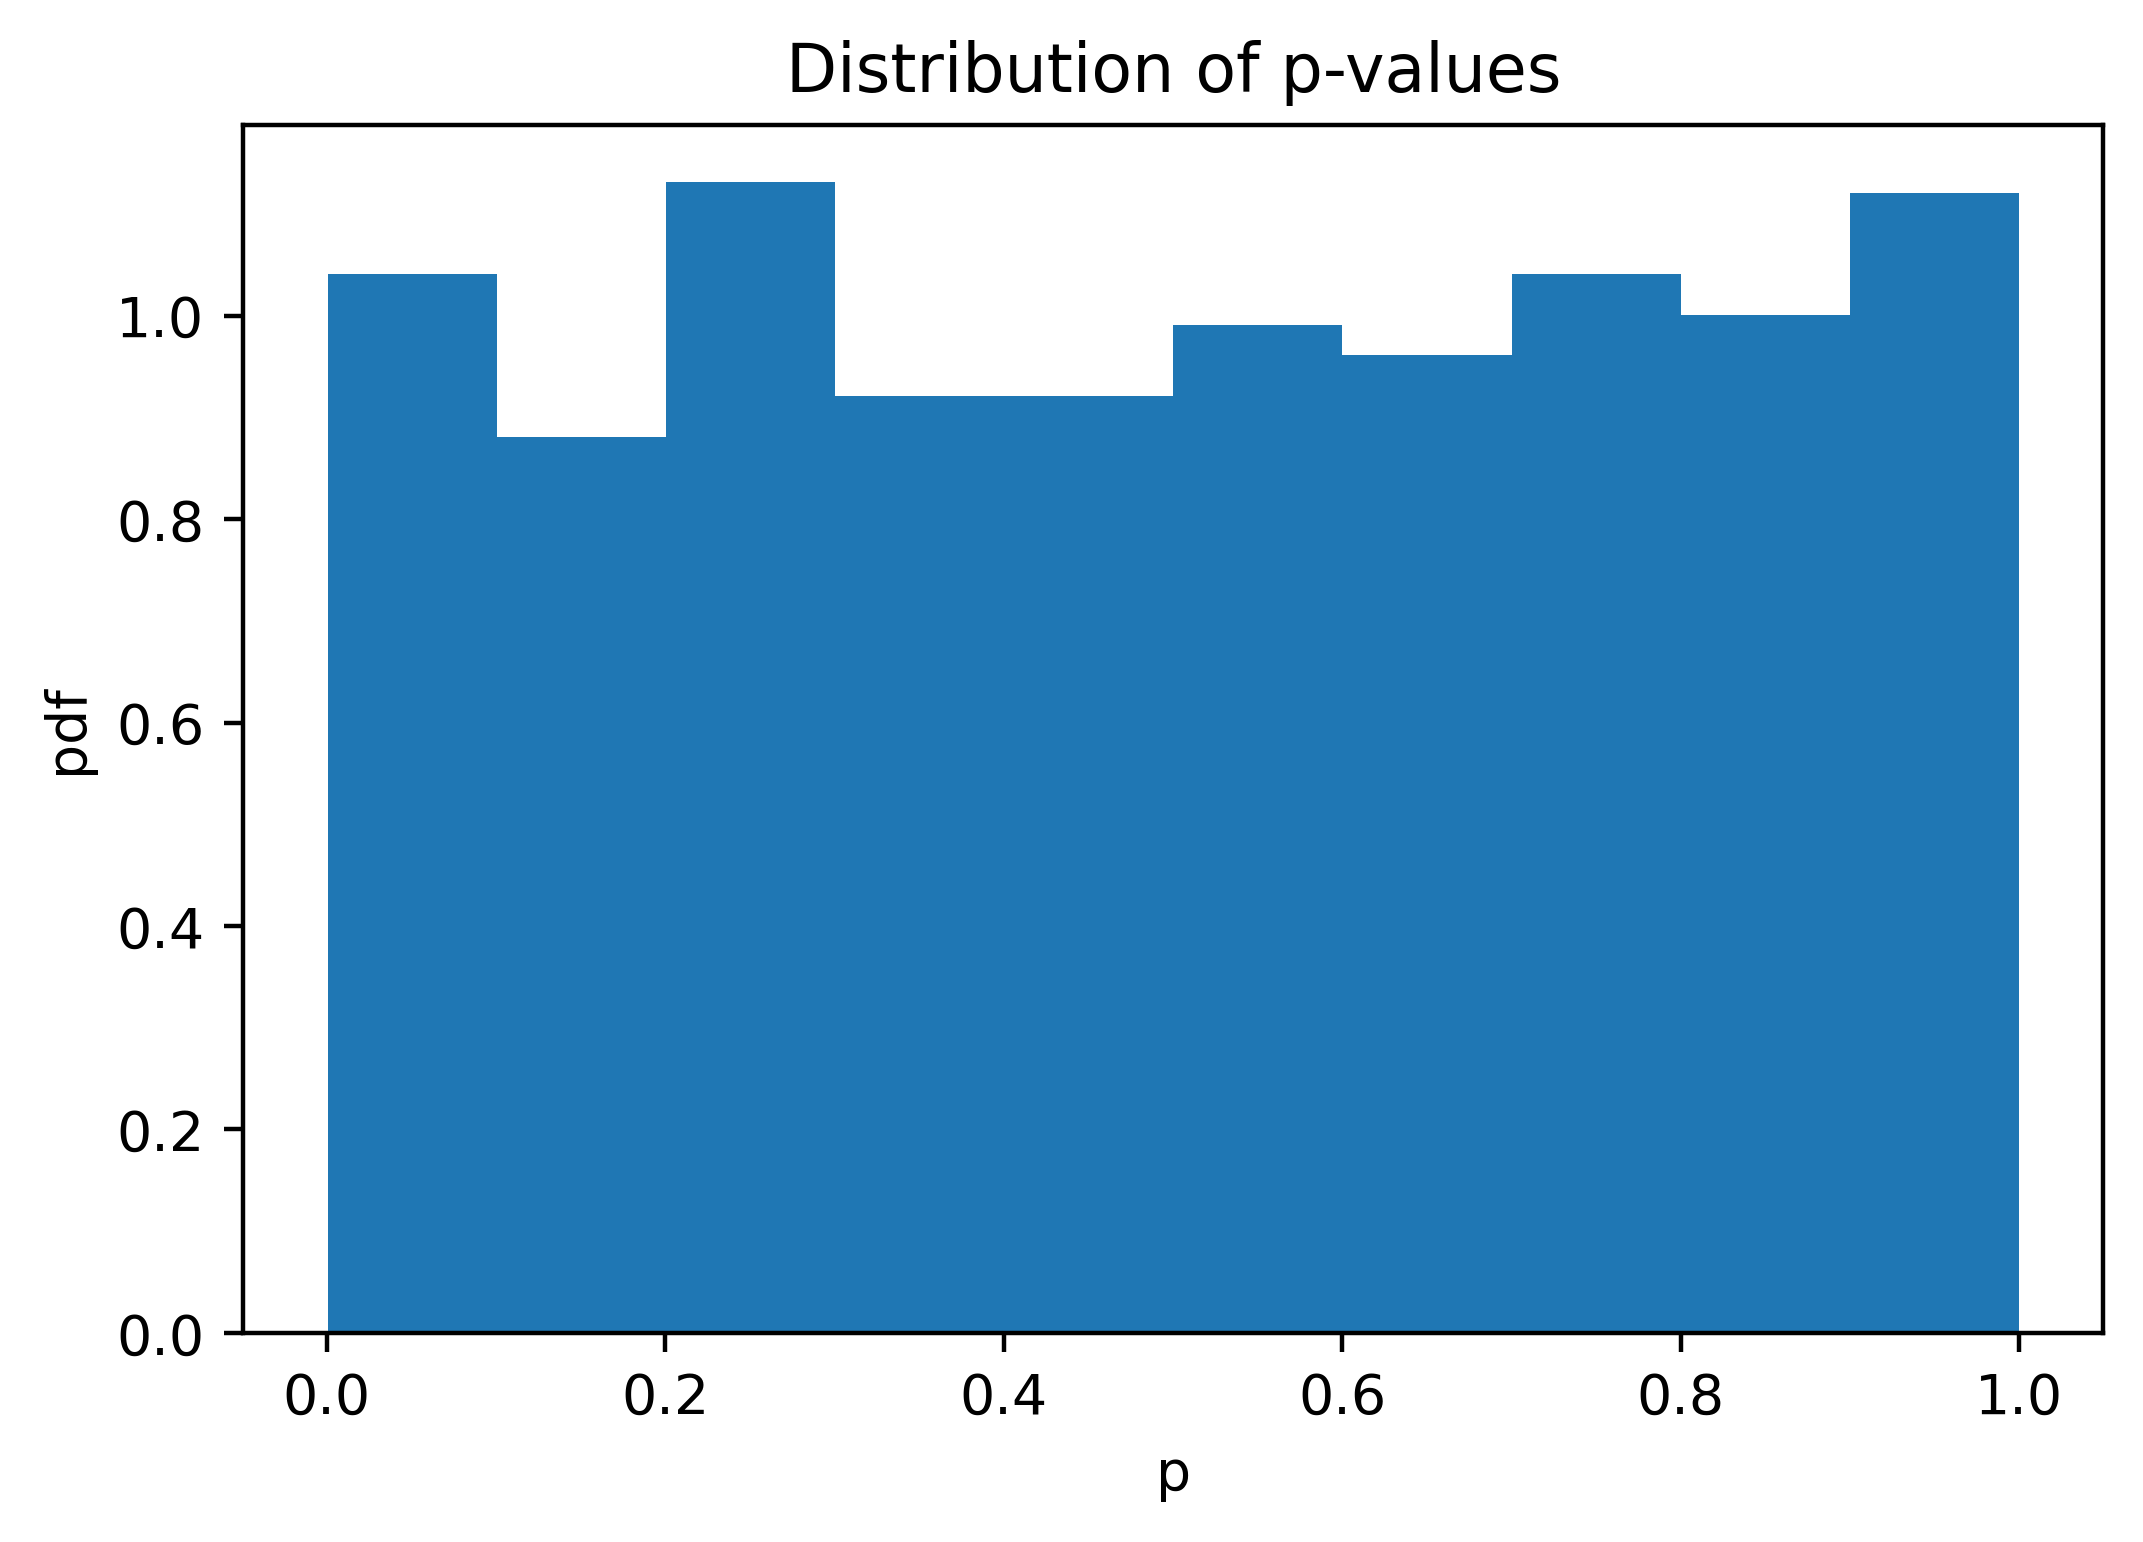

#### Test output (most suspect):

>Entropy = 7.999987 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 182.19, and randomly
>would exceed this value 99.98 percent of the times.
>
>Arithmetic mean value of data bytes is 127.4804 (127.5 = random).
>Monte Carlo value for Pi is 3.138819656 (error 0.09 percent).
>Serial correlation coefficient is -0.000206 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [12286184778135268113  3695839205857207905  3660970937968059865
  7887074821898151509  2385259905796327415 14912626654399438621
 14037845256146279250  8091700362923663161 16594459493947313686
   253584944380452964 11304296082818973447 17565132181074256909
  2782109950591717562 11046650757959107240 14295246207327663436
  8917272860119733308 14331063475680594565  6832048953364368010
 16271114265588460145 12968182530889745260   589241854286444985
 12897196776418733097  3728102072514602062 13115196805040751413
 14900516173169591606  3518128182085547212 13449239970984657507
  2519920494228455569  8577959731482105933  9946647747219108473
 16894579909945163975  6877109846277102519 16326712464028977770
 14749337171264084956  9543493498044042239 17889681636977350628
 10386574631083212563 13072583857296455929 15339653971081118272
  3800935724330088839 10229804137070882935 17647046329146283181
 17315217565217037665  5080528561326818802 18292076722124653664
 18173525974886764507 16411137995798620938 11593153337641948499
 14989323464782790831 10932190328065521868  8517123232638539327
  5764917536453983769  4415029889649396312   461049942959937211
  2427417913650035461  7482333534127863399  6076348325058935146
 15974788668303108786 14097894873623500623  8392756082211169970
 11969985367758899459  6404089236816270634 11974266239971291815
  3725713721733247949 15635957174921544210  5318047064671674747
   641450962298528893  8531751246235271898  3870694048464012774
  4686949138486365455 14049315739168363456  5895550765620099429
 16329839284520191169 11576662978810175878 12165589200179858989
 13546354881082680906 15341989142049572693   166924796317163349
 18445977919314556320  4266002574702564407 11663137668386705595
  3310947905456947238 11000343184523645690 14817874461753662935
  3356482473958054840 17268784687960375507 13336671768406240836
  1485253351918650079  9799076846801606516  5641450233243589768
  9947085804288829440 14794400771929736151 12448791384472301177
 14279866843667723826 14486294078851114827   168458647775626385
  5236398847728694247 15572102413956973835 15406095217503302620
 14363194835855910470  8372297047412008376  2120515364954195366
  8260346113899954232  2588224399017676075  9411364329832194507
  5080965374173446746  5337302637208500331 18087332012974311128
  7098924507770805207 18083827781271570429 11508613696071453900
 13789606218303820982  2390608536251407009 12621811373958240934
 17044770834468759717 14500133852432277006 13276229020623611205
   412547473340297414 11240469395168033540  1575687890376760591
  9162805342857444898 10647880476065611756 16821775961702509719
  2349465152360128737  3506068427708862527 11625610056414081396
 14486401570854662470  9298509051844996444  3814630875603899841
 16603581239437418143 12851107239260881666  2338799406086467809
 15287822393293562125 10439075442772891967  7243326663214605976
  8969679363995337491  6648582769631344062   538907136692978720
 12124838545435267209 12864992305728867779  1578696578585106767
  6951099872298994871  7783804007673964026  5082800810272053587
  4705745510490272840  4481796357352828466 16108880818087929135
  1485330630583344437  8508565345965044257   859638640508733921
  5594664845967975946  9465728462759868369 12598965501313935811
 12236838553541761734  4861283374897088897 16788883394109109398
 15448511556160609718 15355164357497105120  7742990533338181102
 14614780708713475818 12361362228543066092  8328547478043340831
  3146759824177017538  2608341554472507392 18384021987890030320
  9662172936395661191  3898259629223504988 10002110676400430864
 13477117958187948918  7447914910278337047 11450263364309822846
  2747355034716693532 14707623135293942172  6023025707394528174
  6969769738334227211 13638254095247012149 14937538628409900231
  4269400075846757520  8371846078876893601  7058169128129088594
  9384302856049438620 16154563405898792936 13071209696649253962
 11616211885495864805 15857994773481625915  7194104929868617601
  4112352675436660259  4418072865852961732  6267423757802579208
  4247394518601486154  7999952819920315078 17187173602601021685
 14357024706123213663  5313102865388018730   322307168525140036
 12312242767123388624 13003208813694436166 10466067525573953284
  3606309323703236295   851348365128549460 11164032195465673130
 16288432514136238800  5801922581923384059 15831008354828757589
  9154234287339005564 12069236095448470527 17801870953339247720
  2121297581313331721 17754208829788717436 10835120793035784765
 12891804156072476153  9218957585751989862 12966684135121901320
  4122961656487937894   845891107438250057  4500415900386427055
 17111477451265426479  8954934703903052876  2110444424070051135
 18009321927260373580 11028002745357580011  3034761025717425446
 10985737290963037851  2718615023665573092  9575651187845016656
  8929675730826303684 16910391162548347611  5904977235286307859
  8889029727283104423  6360252213159887204 16843485031330176302
  2542674734409499134 16047045653101614609  1011418780055964285
 10594698045014608455  3164689266201426279  6545321049406999376
 14212858761144048719 12738185121917880346 13922863912401970958
 12539600668211912065   465120665051784199  1371016984375749998
  6185373680142049732  5522531318113553225  4956020841176691051
   982927176813488359  3899577585002333430  7776818260159843776
  2054896745164712897  5701087496308216031  3618474721693907653
  5836850676885288804 15230496713445703585  5818775095568910613
   683366297195823363  9436208010828271852  4313497882342618785
 14780871558284677392 15657341015631480471 18317021398400890410
 14551054941610480186 12759690170617628314  4497271392159131658
 14767954197207420025 17236596152915400945  4825494312408531708
 15271099176902484631 16345131390665005341 12378657965256402980
  5007892944980387855  4768106363599890920  9844213859075554445
  1293569653126133464 17734742361150040345  3343368807009658852
  9007209872222929147 17894248077733181540  6237699348818977819
  2220571897832409818   529344802659741617 16698103612568060345
  4396052108840006930  4608891725401216400 15977060154182921133
  7113240446502766904  5092930448685996943  3387704159715335095
 13711174303837653414 13333424635799101614 11699735941797210127
  6112965455033104045 10612053480075227216 15429639213173663695
 18018457322672792140  2356980557532902023   498329577108594246
 14697734534890671002  9579909371628122466  3781125546448747488
 17759589442050784284  9607191806009950272 18116748247233450480
    57101025003984924  5505669734631453175  6130361366486078534
 15884446862557168230  4625713951953680711  4681506085155446959
 10810618590724096935  2053065506994354911 11842271122120644846
 12812769939698131896  1814437187263906705 11911813753424246346
 15455437105112541091 12480052655648442482 18212485418566337181
 10233128807074424901  5714881352174677404  2985874954886068671
  5396750804854703176   497707880192882930 17162077788120785336
 14991091056101006641 13529612889945223173   920838164398069036
  1765483509010618358 12206433958689899763  8337524585362730761
 11773124600198709563  4729294645263162106  2515593647360642390
  4824422782204072650 15790136602545396082 15833991800732645598
  9678041823854989993 17218379275435238543  8480257866417629609
  6521307845137713286 17340915347431038502 13335227212347201944
  2472755784354387547  8249942113991341701 11226511137560986340
 10409301762786476207  4000113244351033323 13977024775157034352
 12671203036873918983  6915965118713524674 12548677230834977578
 11503194895421127633 13249386312805557658 16436000493950313028
 16786743089498655998 16544509233360935962 10828679825177545391
  9374606544058679053   406751181765383517  7034889808008221658
  2581732706066714246 11596225896607631768 15433529736016665348
 16644550660186273925  2566107047289941631 16777262712513424020
 12880737627876845256  6877496019320242575  8841987737489701103
 16551547799104592585 13971516319145057884 15235610638030033602
 15536751329711706093  7532176470819239452  2569359998454424596
 17453137091200499807 16194135934637611303  9779886861381869394
 12411822090370581150 10134397233346169934  3655400916853981194
  9005995932773268469  7044357292668844247  9923033866218498044
  2406493616507498815 14619617008446783679  2973397755928590031
  6474146809726600345 13151810781763661236 13596525670914019674
  5120381121211325094 17373695183559347222  5288624274690447089
  7425146544831578068  1066914323287498668  6231422345064724747
  8707558359446636983 16536894354484919140   528570624617787725
  4076848439445061284 18106846587791521290 11431950046636490152
 15526606168190762535  3258782798218111565  4786856954217533616
 10556117994768162136  2328754961891970326 17620319549592596659
 11715919453472038138  6523546307769712888  9840448790163345071
  7766015948999183170  3474446878554807724  9507795467610400949
  8614700811627409734 14929366555792389403  6278936628919109582
 10074482393548835017  8810633773279013965 14835026964843790765
 17482658914342720172 14849197299316199798 17379525743734122970
 16483386308406264675  6331675941514820309   321029937558386172
  1549839625040842626  7784609847848319832  2117289977433919882
 17017524406670813328  5106983554674089865 16633862531973479554
 17236009339061589400 12150950577989520657  5985229027870421385
  8024637039357197832  2064270714704750812  7168674003351002792
 18203615319720894723  3567455168689485951 18058673351863583741
  8374037428318993168  6317820428029449033 10536339567049767204
 17189681462767518752  4426146202385534127 12050002541342995384
 10846969483828329463  9941791323530669502 10906869400421054223
 12685254541611366911 17615797507038441814  1082380626822897450
 18222947144702620005 14986646224471235677 15492317337059912638
 11599198874860420603  2990136445875681754  2805291756566914305
  2959348066105456927  8240117898422084271 11712609156759203182
  2638984774458913236  7040119212362422297 12541658391359718949
  6396112662142419027 16902415616440757957 14553827574509749151
 10324070316914190549   631581955528803337 15506860021355921280
 13768788242377971072 15986572054002466047 16324590278831350052
 17642836342518330333  5769629184867054283 16394900162121052187
  7680612067597316727 13803608908826652340  2980398530778626888
  7105826173036007490 16228187035657059050 17036762875615309412
 18322880184682681088  2149827891124137936  9107382598049378941
 17066383000799075244  5439434419643017964  5247220598194824746
 12691809236206844900 16722535093974954303  5057883150451656500
 12217959278949020140 14773393520383050667 11834932513774137558
 17142829417306483310  3408071455056848502  1748320609879428192
  7647320751764226194  2052469876251569364 15322475132414971176
  7379456076387505664 11183851296335004844 11526809072800112855
  2032607366360583491 11625635839168143776  9013913274739378081
  8864258741678113451  1654062274877390981 17338591681027688796
  9350849579453662165  9809962813045821351 11437466903898780320
  4215429774044659724  3963694337732691086 14303009227137237470
  6120912531374757065 15197248540756792218 13406194972608267162
  9615553209847379278 10438337838217465096  8950215239897363908
  4278290564011370017 18428191444272752480 15656521804901069748
 15169487108857105819 18327081656991565054  6157762679032644488
  8661272901975208866  3981575266504217071  7709694726947941305
 16929008516652071211  5836907336492313416  8942517513578490883
 15383470457108177965 10858780609940096278 10638322020545615888
 14212372687536124805 13517859626033908274  3436723440559754403
  5522444742083597909 13688820800303067997  6117414388337251294
  2390391707927969496  9090601568822054695 16052223514175468657
 10301023423553629839  1388647346246787186 10212580364675835537
 13418012909929614194  2008756094871792266 10617308131416312915
  7489569791124675209   595418637374903549 17459126885362453561
 17567739285602112257  2686794976443279112  9038969420298908492
 12343059058320339640 14873555359036874852  6576930425278679976
 14159188006223418816  4139780136252285462 13617759993944105071
  8620165368382627802    41859853843161927  1016905201957145036
  2742905168352760680  4933708738067900425 17422134304219461591
  3377901232759762200 13600511453251175446  5688184410374746086
 13972222108408479552  7299356658416820259  1385759890151035973
  3419010666786373345 17537635174158142795  1482751309853570040
  7299347614556068883  2050897452951266575 16982603874740389751
 12754821384406466238 18051611330846481564  3880623711528727217
    43117049965519503  5540175686637898873  8073778391724065625
  6389387858811013028  4292807801421391624 17258194792917959146
 11460684605241391052  4102047059714652323  4949761966355802643
 18249056230490345079  4035646134117439551  1246503605220911448
 11468518342036206172 14931784128537255215 10374651130048834092
 11661526038807153138   609481935207639883 16070132183461034355
  8237248926884003481 15988352747712593320 14823577030313753466
 11841296499889462057  3602995971497102192  5556071027718322671
  4394991873516749414  6142127556642343906 16221733753052379931
  5581034812140587116 15654061204285273051  4325276946879940544
   580872078297127417  9333397593284354314 10785570366569871643
 11479069702382831572 12839855395166543656  1193285009049848435
 16847992865063439257  1118286853092498982   594967510826488057
  3184320915700622100  9370976243854258518 14255547983071209190
  4675536435807716511  4417480224601398080  2973749272904650789
  1055631735865584393 13396140549078640409   329983378208724128
 12631592932469831373 14176504903534780102  4599649025198625324
  9091143176420593667  5428816363285397835 17166032847920014233
 14174111131762318324 16808767807547555373  9374627651585731229
 16503535293842885286 12580999121759544209 17675658903392339953
  3248930510925557323 15170271152169514045  9810776113814475300
  4224412391923947352  2134658561352853584  5687354402884197283
 14261157242211224481  7649136134356887558  1473671777687098718
  2412085928781330800    36160200144182437  4859696523278742074
 12593772535480500466  2933750620316520165  3612387093900444853
 13447689030078210367 17666254889375608772  8694924558028038141
  8529644269443053424 10167479036937087930 14240514390823588715
  7260541440682994175 15202029371837802335   391269565931628913
  3880333744431931932 13965338620069218749 12807640200131464724
  5208599426528991657  8060088700877513355  6619622325758623085
  6831587656976164510 17787210096315330173 13713149718449496480
 17049300967325770248  8746414665634879022 11403259900784431458
  5027797717157958577 13900252913964767845  6347790195952085204
 13847658675058486475  3111703562818094078  2901483199803037718
 13969160387383016576  1154158231749227155 10335584026032039247
  6127350514530174451 15975166479355820099  8668333610432352621
 15477864271590625044   443303091860782835 10839810381008504490
 10958136567568042812 14142500905751478999 11416557634599143736
 17014065988760716954 14596172270090180656 16388005698530583763
  1380330834448988574 18186483398434315480  1730056706974366888
 10467451331223687956  6089488164635094887  4839639125117698760
  1351479063242726011  4991191790418183276  3943715293410646140
  6520144190295914708  3727839909637787958 14251751182714826125
 14546612907568707674  7093982236942268268 12856676420373402493
 17502494711797812414 13948510936724085534 11824265940575849614
 15383212847526265481 11672328820967356653  9829253103259739774
  8769697069583790703  2783006378081743583  3796270834465785541
  6624757601254393867 16414955986164644766 17228215957620431141
  8522995896291764411  2404311925027060965  7097193732640292608
 13411361542703590810  8057831787992939681  5428255714301061739
  1843854423338162135 16162784019976027408  8574179765573420380
 13867593904109894900  1919114197115237203  5737882768902031883
 13224113964116761342 16209168714487082564  5873607580624929188
 11560554066685830594 15713539428051549474  7725872833606884977
  6890032616151903908 17144757300571440205  6701178807880196992
  5109982708573900326  5946037637556787853  9303731218814582158
 12958645303332999080 10470375755871262211 15250031280049896799
 14859915410681002996  2853812919007729441 12099082978465524987
   567505794918429411  8496848294703614965  1371899312288566993
 14704705742732742081  3831714720836687254 18121074203986260650
  5225028320931004040  1736141037235529467  4353496063433395371
   519169061891692799 13162344981724475127 10114304224024438858
  5975441118360292610 13827731670112947945 11263787634316454131
  9861435048375648650  5632262386675668017 16599767762423408519
  6230446578737490200  5600344057381242743  1690846121112740913
   580393567356825083  7786401868771643019 15351430684807267554
 12050017931320662829 10610444668367184907 11348216320968428908
 15154266384720691360  1262598357522476109  4628169370497820965
  1092580791428046424 14777271921287277382  9322408812593181398
 13918831008896798676 16068799388262605233  5383489213859089711
 13459737173865942643 13689189225007575219 15967636029851928796
  4118740968334844466  4804091572940530772 16372755629402678706
  2657090219635518818  8209247322734855735   654273357595518564
  8794450351984353700  7359026785037613356 18395117068933344470
  8334016986681202954 17387609460659992914  1030621507697387447
 10902198942835872473 17417833612120938508  7271023656620521243
 10631489281898135510 17498305351455709792  8046019027958741538
 17905076983637135300 14318543092074271209  3848542849123799009
  9683700808778032679 18384131982899948790  5304210982427311876
  8053705190134765981 17855706610160495448  2443898178920096299
 14359692264572815151   443329128923229889  1943855468073905523
 18294757050321323222 13417180133741261166  8713574031248421786
 10587299057699449671  3910354012254169609 13089518937872600588
 14128435434989822250   731485675114164897  7483949000446264964
  6440550363280001442 14843171693875684248 14512126475693536309
  9799730018048151989  2984623165125614869 15262395557467043915
 15984512184473974067  3573906153168356576 17713242467913604739
  2695816969842443958  3015400447091293044  1946715856174346290
   925233018042280099  3137000414253261444  8927028984149183886
 11944384456546336593  4828372994250655586  8945138374825757076
 18077872583578723500  3021770711379210829 13011755873298302582
 13671027683286740017   203276349661127156 12550373894715523301
  2897854205788061975 17611815670209251690 11736721620171026567
 13008856421477850384  1988952058379663220  2073420766942042123
  1750623142834959168  6239562640136268097 15547834009439213773
  3262320081798404016 14167024106188948100  3659252354864426629
  5490029914101891011 13215099331811259893  3179575938173793308
 11649270667702184181  7872879010282429308 17895389062285323985
  1665100859812229043  6269910763088399233 14075939137530419672
 17146274478851910626  8878793137648621054 15720372356749521288
  6532235219761163441 10681921137516791463  6419385040597028280
 14415047803723570437 17070850409561175621  2393549104949551056
  8543383633694765472 17506706965978880416 16111788742469019904
  1566472497616664061  9604572625514150449   913207885398931236
 18176608881082763345  3462164380327931201  4677446342130270369
  4389307490983907172  7100753550990489654 11915783521858156574
 17362001750096593752  8049390897924542922 14293360897460560624
 11339612370428330877  7132671179500488355 11813055892735982960
  2774924693275653444 10834237185113257424 10697093311636540711
 16251848376569631622 17393643585600380879  3708548487319170265
 16177472471846920244  8615854835768358180 15452991980398574673
 11815438045655735933 14030156529777493711  8876632541679614600
  7726841628148947399  2102994135537027604 15041665566990549182
 17257719525157973161  6761900254384718129  9987472686818560224
 12554296629530376219  8154546357645347525  3551512378858848195
  4306669622020774053  2190899929771780282  7508193733529781023
 18211281570757538950 17873856998726704838 18340223618718226815
  3275316265714938076   707176408046674070 12212973091985298894
  3269175805530772356  7330081707135133227 17809264819960731812
 11431573299780577019 12278073276155066759 15278402188935424858
 14748733139708784924  9102052876291715509 18214940932447519986
  7290740753387235296  1374270870288638622  4027549853313370926
  4602008950113326615 16600081487790599099  4893216364909975873
  7877610008416056541 14103842338456873740  1398687403839390162
  7550821398841624905  9796890411315213585  6263971536976775797
 14874109593965775823 11833352629107256698 11856603488760471480
  4603623896133320683  1934610305645766477   408083354754994722
  2522548772370534687 12930630466384500577  5811365812260988452
  1853413117996711491 15920375766956576083 12832591006000573790
 17836295000252381248 17960720258770080743   610642061009956348
  3412252509390094995 14093653534855358402 18357560537215258983
 17500240776050025583 13322962736905622955 14856047750565123654
  7976104913455445624 16147874437957546262  8131286362975971724
  5259294674927487935 10988289766514029847  1555416262697858902
 11833857084469731024   142851268742657590  2993925174964294470
 18066946282465936112 14631690704902947748  7517340318673182184
 15740882082091050989  1709424851691481499 15919985457092251253
  8846575574220662286   921712723332018586  5191145939541472514
  4357405710133770172]
* limit: 10MB

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:18<00:00,  2.64it/s]


## <span style='color:green'>IndependentSimulation</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.5738749758665503
* statistic: 1987.5794002830767

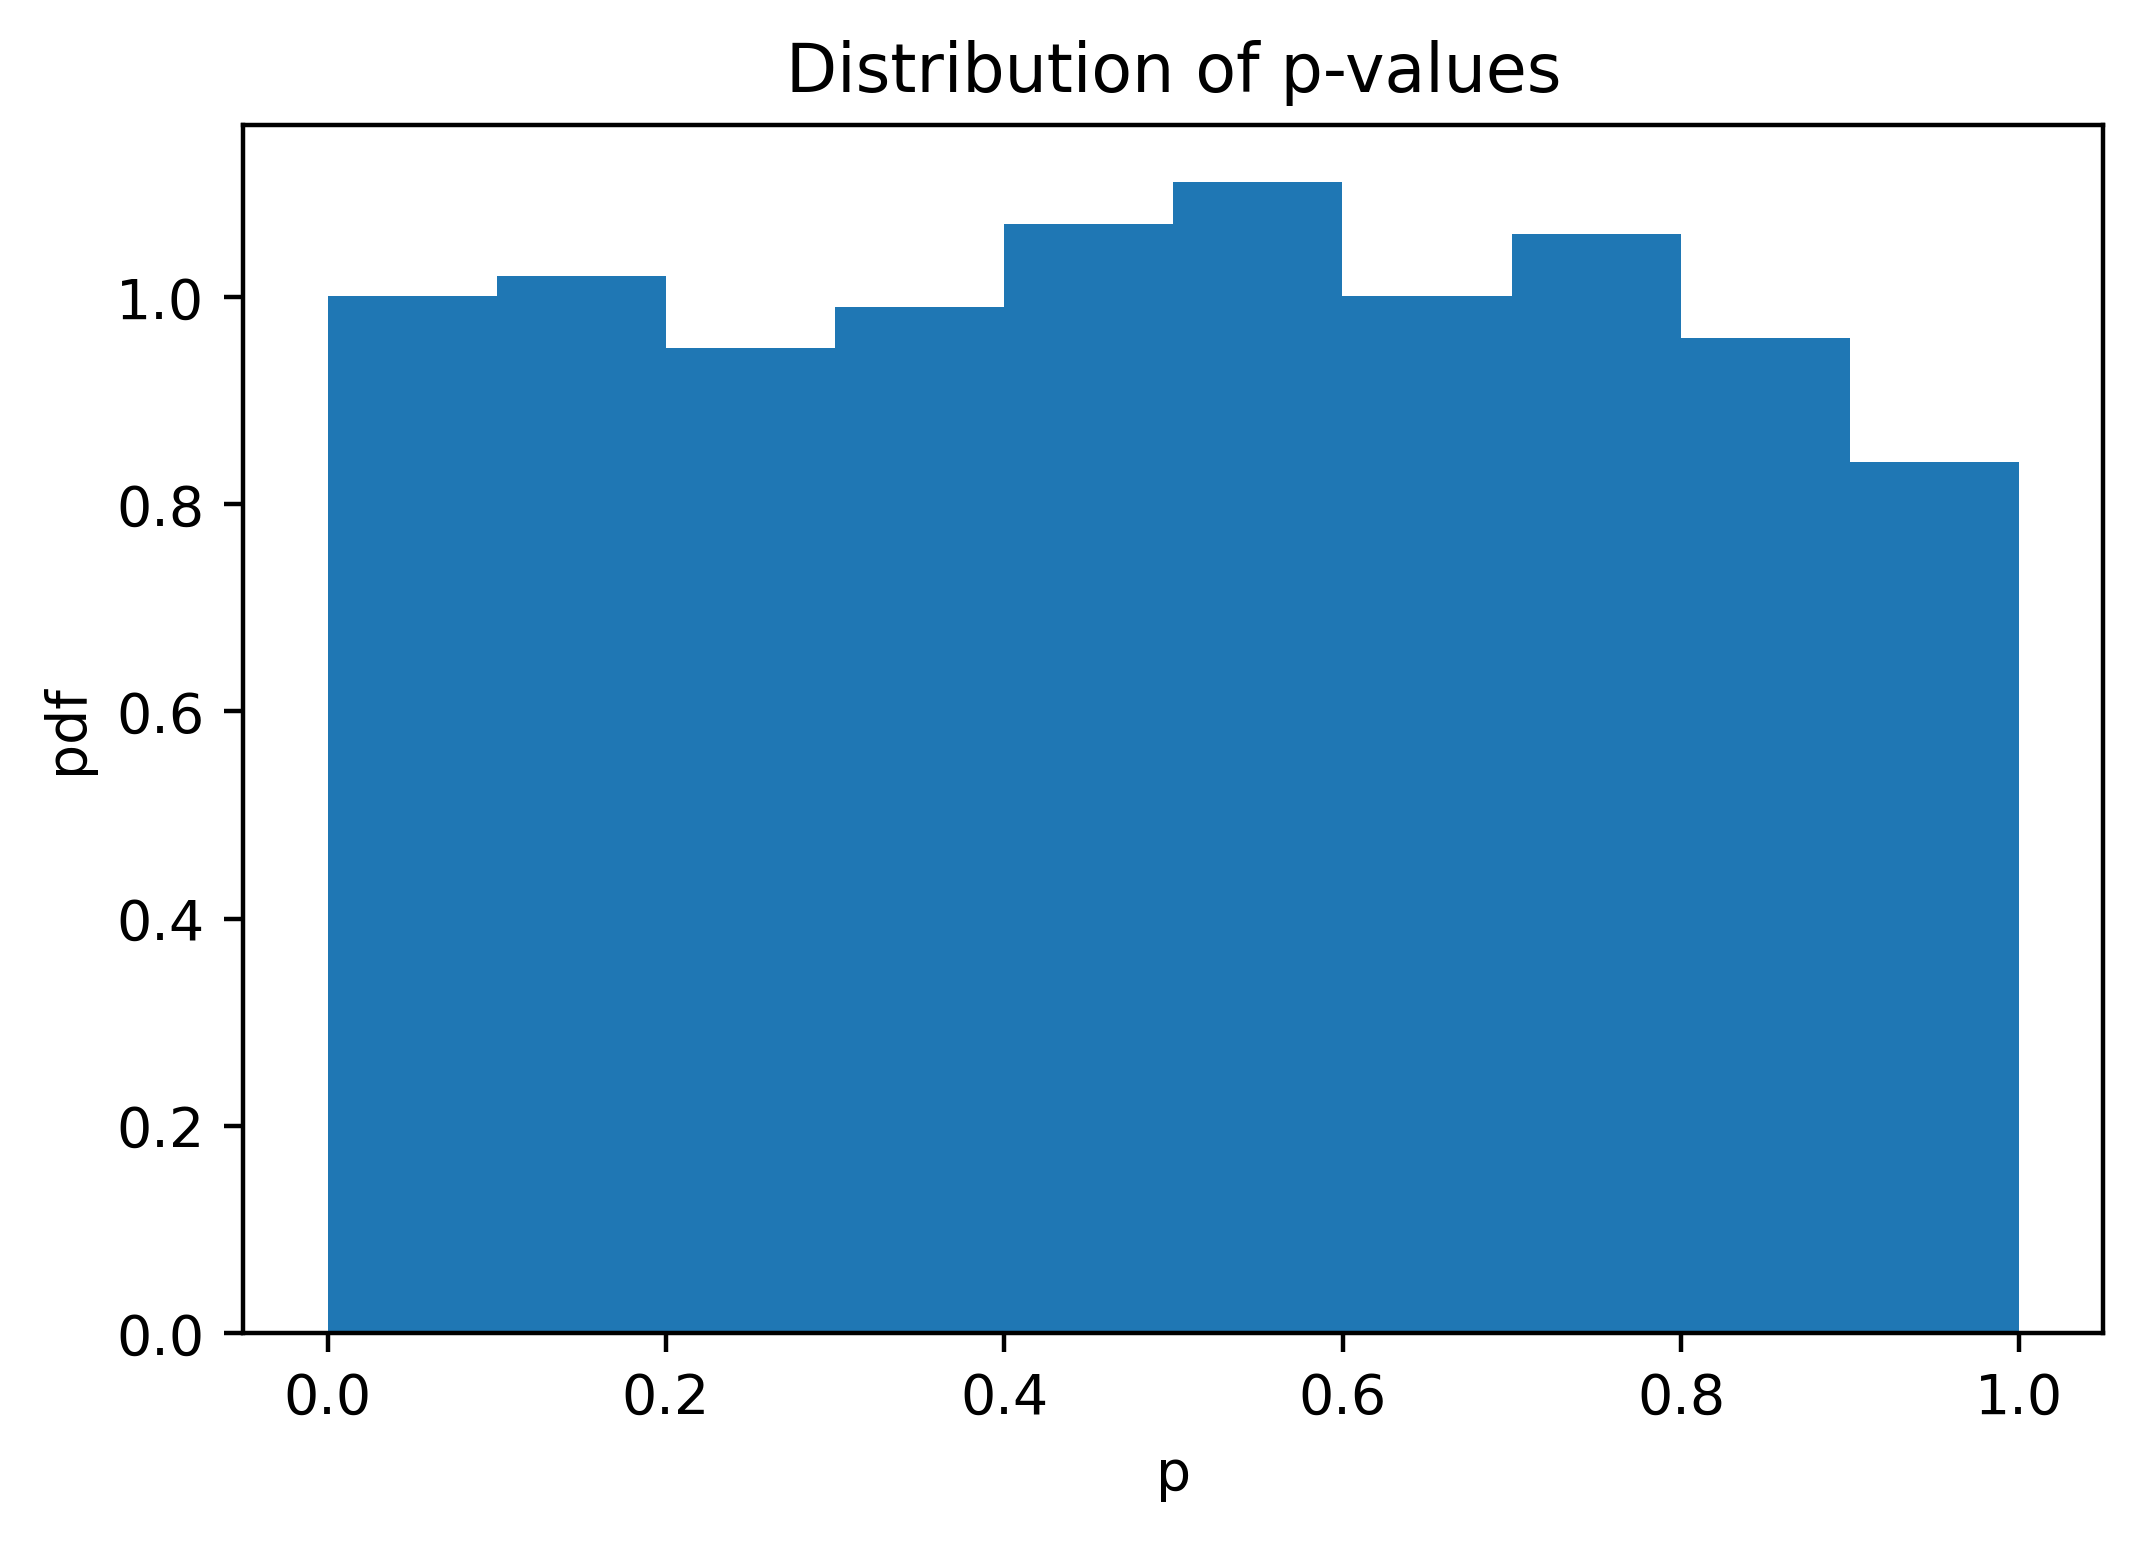

#### Test output (most suspect):

>Entropy = 7.999975 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 341.68, and randomly
>would exceed this value 0.02 percent of the times.
>
>Arithmetic mean value of data bytes is 127.4906 (127.5 = random).
>Monte Carlo value for Pi is 3.141298857 (error 0.01 percent).
>Serial correlation coefficient is -0.000234 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [ 9667645101920220269 16255219241033117477  5842823655631979240
  2161581598369065210 14870017643727745183 11625034822124644216
 16498189748165453187 12847473812360478176 16862500781243935321
  7249508035834334021 13913160385225881559   487531467361402276
 13756883716482614979 15671287313241309065   168285271127167725
 12197818124585933481  9586696023645058884  7135213597683614240
 18360505708564442753 13810939059004926269 13050848913909141363
 10158637685986975304  3741248305618075156 17767130569473068281
 17415060834444369018 14866374665345274169  3607791514711449939
 16632396378289088946  5049975900168410770 10543835521492790542
  7675765659333752240  2307078865110007091  7227808459224230055
 17267376093583444749 13559095226477915269 18041707370738817995
 11388239843414877606 13791656278495182933 12205096774942935905
 14904862182210072409  6065629248770468046 15324233534270462259
 14247965821309569261 12922133318727841700 11144881336864532174
 14320227691672275807 12752943140837635966 13457361107691722695
  5303516494408336427  2457163880216801544 15508472579687799809
 15776908320838011795 15185548398352010535 13420666448954939253
  2075514354125467780  6456212810939866098 18366275774913084683
  1511274465757553643   945859545510475213 12617148009407506770
 13772151200932329932  5144985377205559651 17600975749257083773
  2702813617130647984 13007350749256033486  7978814107106204545
  8675590439183941978   860848508073295777  4768106078264587261
  1054430678855823062  4912725034054204918 16480354118138559607
 17650503481833534139 16919326532445243378  6006026045425469420
 10804529614996677296  5261117823401236536  8365650465787448306
  3512134732383822415  6813705335930171587 15507067272727954151
 12507037710604838285 15198562697855104798  8887394389344506963
  3991690540699473084 10484128424153342926 17538813669631913362
 14998057701799234788 16127880921725024152    33154935387108137
  5645514971990754740 17048070275043467501 13096665067570660255
 15892267530159285597   388930223255313978 10143223780470775124
 16627263328563621752 14678814133969399714 13120195401862201490
  6543117597587866117 12568969813099882192 11699762693540445392
  3884205795685097462  5150437637610984008  8530803030094043745
 16783678356462964639  8233318096262083291  8799987770651493213
  9367682822123782022  9561773851191383411 12527892399581570243
 17867215365822965040  4412650687648478867  2096698311974259104
 16958238298638376363  3714419300169937586  3341977125276618096
  4188308663176354401   216464223245810641 15321915405299404788
 17413671957392983372  1070896256227795729  7616675940805084403
 16148641217264508827  7754697923225442885 10105702826147332529
  9477554741224153354 10445135755242381115  3432170373339442960
 16375206387284544139 11060128439736435610 11140362649093351712
  4803089196964310646  8388425062683380753 11615578077506320651
 12433939398596321584  7309630387917543057 14206989647172084105
 11037953452133375561  3204914774971983575  4555337115778792326
 13804731402552537155 17792780964808033557  1932022910471092313
 18076361390404093653 17756974108992250915  3919631781743389851
  4802031361380075409 10650877436914732321  8734507380082643590
  1866513953426222383 14619793699675398109  6408483907982964495
  3547159546507384935  2913652455940331942 17210048460012153592
 16708126380930636756  4082879491678932784 13467738558166908969
  4339448123222660027 13318258692065708444 17433360153017438163
 10158199416817164481  3392809442947631357  1019756378606688669
  8289812799097726778 16773544947088652783 11236488169773720255
  1087610091795334723 10806705781630207900  4605916992498623526
  8578499317010795557 17275488925955910067  3902370800130832108
  3072956552638379691  1895092365283710685 16391794510012075008
  4291506324474661910  8103063338391946022  8488834939722697562
  4979244828891175750  3162135092665767095 11708213375744624366
  4600458928325155918 17858919940787126228  9396002908875783259
 18098763308463666667 12053471560830636715  2884345393175021525
 14877142908356062164  7019559330074300136  1425614429498728402
 16391230116659740323  8222257261667359994 13964604222752734445
 16351488323563784147   692004173482053986   991384539038863523
  5191373024812716994 11663081709195331515  7210100543311869037
 11102211830568236787  7785910263253810419 18078408341806541085
   553057290728962731  4566278034658930340  3241825586751498414
  8153639052668959662 14985697623228012023 17397864118998535758
  3585738272164112764 13724956494657048447  7991087491218591871
  7931789105034322438  6286633221435554911 14839711763420050955
 16176272326629035215  3863588252930061157  8215912564501226765
   299675080822045836  1660245196468492755  8529284230032340053
  8972040050273078292  1005930290804397375 14442112019698771921
  5588267308388594376  1707769223210054703  2450932507111220376
  5487563853079507110  1315136061169899616 16244770460530307704
 18326326789144264638  6697239016291811281  2044698188209780207
 16176002802483415535  3334275029484265633  1340429975718556688
 18101771144776448154  3087466478642403997 15639562783305670291
 14798076847012323818 17318107876352659263  5643430408760042222
 12285210638969949746 14407083901339402847 11743033686870113924
 16653953058354249401 17459844900403514242 12791461229971421920
  3647974739484130020 15236844442064072160 15076008952948388513
 12140960962231495073 10633421608713943771 15549598697667986594
 18315834093769611612 14206956005961910937  8711724089718084749
  5198475508442741676  1484023515442123640  6732308131521505634
  3857269547415780374   813422490006274168  8503976589370852110
 17681064468129785954  9495111762112563055  4969299713876308698
 13469607210183571297  8231313948131487552 13122678474807188926
 10098485757441134635 11847650474068305018    78244841430543471
 11397898193737929577  4736084720412382639 14702287400937649317
  2245106030512077669 13409577435604633386  5983370710591752733
 13746510535813142145  2013006141113689458 11719489651236370888
  7246701261658505777 11775553989518112351  9886344102164304897
 12792086495435355724  6932211490086679077 14649255565242248886
  9817105075172455077  1673429300032892842 12192067098659187364
 10301599008965602068 12647651387511222194 13039728435360152988
  1708827242267953320 16922810528001578723 14560332032500270694
 16233446391967372561  5631184783199099816  5775710280178767806
  8031355961147754580   270958076175366061  6164579236931729097
 10411888198873539952  8656784264371282262 16756099475318852513
 18241266525333470057   702682181665299243 13357676728018812466
  6256303881749574775    27809258008249405 16003238838735565214
  8063688173339609328 17248659513774641934  3087287629503115418
  8701743125392783724  8318163901324130482 13409292869950453928
  8333134665666289791 13762209190446358283 17561566227740637747
  7778527114526931804  7916432714057802552  4652235179592280830
 13675778922015745867   992145959791288612 15896344563239482170
 15892699582809036670 12031100416518349375 12364352697193785050
 10323031049416878366 10587112805416502045  9562425905334456183
   419389652787409781 15876211489242661449 13159473277143021486
  4460258585144626684  4322050920378425653  2970837630403220896
    97217382715945529 12378099992670380415  6853127003297631436
  6676096259214254767  3199466456303866993  9475409846215829252
  6913133750253026962 10591319415997252947  5696123364883563852
 17946809770790406907  2478076676098523666  5322455235950665098
 15047853665529786812  3235395826387814936  4327620577179736565
  1517053857590640244 11490949721907459855 12639333214226100672
 12300355649379106764  7377328678546481498 11079137663882986918
  8481010042268461839 11495979276663853849 13257465193996054600
 11988487337687036257  9718368473045334665    55086302192113987
  2598353228338318688 12142940241038275583 11173486079356303344
  8357943330552789395 13620575160490594613  7649580812606137102
  7125288831909533244 18280785063939130567 16305755986233963608
  1577230409956640619 10107654318501530442 13539319411470190692
  2734730693207975364  9971864118345266938  4518697300420311553
  8260913219657615959 12919027264671617327 12979542247560665574
  1056209924694029212 10867863116050404660 16962057119359785108
  1864621735199740181  1153650270883229533 10988343479380646909
  5675255342055721394  3626659408815654176  1823405097424196840
  1036508672913608762 14196501923463376432 17981294468465888754
 15901052601917234215  2637683980055708749   342871222783804580
  5207696262015913298 13956197274800597608 12594994324232920327
  6157034262599677249  2744737157783387122  1505218581331175991
  2107787717792263400 14790741066519030477 14557968194377292937
  3602691028000784778 17652513886209241539  1424261845577749993
 17063254913054597422   707589858415237082 17739798095096967746
  1417252333383345276  6478196717567902522  3666844577535862724
 17413980521311027878  8873205310135905545 14333174263682121234
 10975253019178446592  8150094493906826422  6438943108980259087
  7647894347800117386 16983780869975178613  4696953613484074189
 14158482358379120692 17769591814261819273 10868132939879421628
  1559412404252496568 13546824594202434061 11861610291051753390
  7673593491158858327  4775041190730409920  6977600390183904438
  2236454332018202194  3226033392558180861  6516233893322936932
 13113180189371412995  6457731429084740486  8207768254425439642
  1746180665979406794   755065771821517643 11473161336528028359
  3923380980268311734 11725848410595711501  8489478265916786136
 13315905404096564983  1814592166654611644 10391544675124100312
  6198621133634730224  7618402377813709996 12137318445850826674
  7770705313516425827   479711391743139331 13009446456204947464
 13817573203108909729 14828628592316292920  4721932942737321067
  6550651289957816830 13387048870144572110 16773968704987297229
  5372367578741484294  5570679208844792663  4224996651856775253
 16359015399781151442  1258623977503453615 15712518816527452102
 13668586468262403477  7687481523282329691  7123589496734018827
 14872704500838305461  2019758271684332909 12348599149341421637
  6559559141450283702  8866311382337428269  7416040430469657196
 16913902317953696062  9176219512977204679 11932722610585005725
  2968080483692635212  1120610862003378527 16461923130070257611
  1157905121102696742 18334922961383514405  1684499739191537321
  5304215897661557625 16649221048425316583  9021351283534826644
  5425804413414931033 16312069513121297531 13924458120041582424
  4900084475928737975 18415243454188975351  5140876130281284219
 15636134881638568243 15140364241305407119  2585609554171475574
  3343195717568798889  5475548207625218472  2733496335882070582
  3205762778522281942   486252817202991291  2265155361527874169
  4113448608440951067 17309351087454591539  1507923849723713240
  4226010347637190888  6643887110871841330 15354661911450766749
  2343155189690576715 17148690111393628447  3021306604489658448
  4232402769059736195  9677692146974203790 10597561750013296006
 15807685568403601126  5456464888321163165   834225468815898339
 17417453606391983803 14082521499325769356  2223202510282185370
 13537711519967206703  9366438281025289952 14412779163375511645
  7318184986694020402  7247110573531082260 16024337973726446037
 16019895702824487090  6635543756908169787  6290143767120984393
 13483190932498255952 13197937982936449785  6185113283615518815
  2191367876162503599 12492097760273837116 11893469059253803040
  2356237310930130122 11915056737663223229  8342571034886319804
 10884235183776409637 11114923163657115831 11753590448795696196
 15686596212345623957 16753450880453661528 13769003936802102433
  7136633402253283091  3812774303528249824  3005657897197149371
  5761640274693942643 11177815421537065944  2160012100981910945
 18379829831964951388  8357287576217249357  4354190698123677528
  9148045786018344549   633096404330100796 13546093782075136805
 14996426393830254258 15897225086946133088 14712918999583823566
 11308034090217114662 16710497798714788359 12155356753375921032
 15883972327853069878 12195520611868081266 10988746076899759258
  2590633444826670756 13545429400711401209 12898544074975006075
 11400992888447287720  6954089611827161655 17203118957595448684
 13797362321581331371  2184979172551563567 17501868409339777655
  9076993347041026756  7767108536150401871  5952880059225402586
  2375082798482479510 17164513515956978136 11402051022389898022
 11964894530330418221 10063777256032211085 11007459058584935297
  5633252459817674783  1452334780193361662 18251256769486408961
  9837144200100188793 12801214205888636217  4999397693380133320
  4806017044924574805  8440479962862267805  4829775957679819482
  4115342671590862547 13138821698936344125 11255063574111583298
  2929631240108326580 16513786277863413375   909303809787262911
   448750142422335940  7890894109405817914 14802110090831784658
 17643428292720829630 15026029762771238999  7961195772623655084
  7958651652884660988 12317461752029934056  3846551140866218456
  1335040111513314992  3889401212248467133 18413664377217028990
   709778134125337693  4757632826504232222  9875134210946516913
 13851270390400849382  3060392165925967815 14523177309679175202
  3201912549090700064  1070526904044762313  2116773310076270188
  4548091658175400795  2898466690850385346 15574291419540266364
  8315235120731458602 15251735674887972625 17687849876462717191
 16875249785146589840 10466556082013160290 13371849329769633341
  9087497372839334115 17970584191950707545 15133417541186809728
  4145280481679330536 16526326308339985583   914605265233957098
 17328903288479476022 12174044328432575619  4804756145351427073
  4401047308541701135 12745716721279033304 17328969740612336287
  6347719913271857908  4959747658571950921  9664747257431700639
  6152854374938897162 12751830352643035949 15993694649788303996
 17690120154740313143 14684131654657701827  8059135210303352625
  9322550144215277661  5866749364818531189  7886858745157705417
  2442680434953330566 11374360666482344172  5542791572380344909
 15794059278308071170  1516326918110943897  8630805275457001119
   642796094684520862  1452945105096974927   775611227549947527
 14657978655576538347 14610272299931909124 11734667792139077164
  9525740348464159263 17737161612045874759  7088970517972604373
 17455612045648065273  8238409059586909251  2108493761134573083
 17529886284277203425  2547180163181461871  8875970291956582218
  4577210301433625800 15386299332819853911 16303869524430027444
 15569417510076595496    96128631974587327  7278036173551625223
 17003313315948428050  3317660007143752242 17404024121611352820
 15065646431670123830  4297977841764798274 13510369194204208487
 14303742716638979614 17110864266600198161 10309270280545163456
  3271180282270536013  9779972964003014163  9740000228538407471
  3521228485293535723   246297574034976799 11135860663349985693
  3686721322304104165 17451602174630665781 13740473313547529047
 11082016926651639708  4353392861152705008  3720772616140333161
 15147229450452164284  5881800181191985820 13754626042158672374
 18428060206278292588 14333072633833654650 11414173343225830248
 12595869395853109881 16393918748026480140 15086040220606824768
  7029321524460229886 14751845334132144784 16277576008201931030
 17007370751168500555 16427030881689393800 12047726745340883955
  7816842607963335967 16192532838367510046 11478858234049891324
 13972321081520403546 17720883311237809938  4756781497575703016
 12847152961401018696 13631305807875589284  4401889461863530932
  7717916428478287104  6686497094001973201  8302339446914134000
 18048459481497061367 13705283173719945285 18167143111878606101
  4735488633771750543  6321839559861354711  4329680387170298607
  7955446363483675069 10279690384830455137 12260731483596017675
  8490296798636881254  7546788449305841576  4796589156605027310
  6993735449230843239 17606332951867811438  2855614181260945497
 16249480691095983631 10823362700349399593  8524420424709869247
  1170259133188891179  3814128663526797717 18337327152445441800
 15554136066114449704  9922940191735504637  8222294156542120810
 12421433604462581646  4467627997237591440   878553306520840802
  2963376273592859777  2602011882853584683 16915994920994814916
 13002870337371131408  8328900630829150367  8313148071063975086
 16727314210990416619  5961454417374426190  6537005575323151426
  5547746700756158623  9443088367328565242   931301320789192504
  3148751538874009783  7263558338027777459  5742123086268949598
   395048270254707615 13565846762540119347  3374009514170592465
 10494790836990083746  1661352865314864450 12236232360701479364
 14502806902342044872  9770998552105048018 18015254290799710963
 17951066258508464636  7710002460895034962 15901412403423355163
 12727925755207050402   252108760480219792  5710964340437856904
  9717890004804788947 12511418446795081545 11519135508661513057
  3039244964333669017  9387285334796156318  1356758167234767907
 16240459684125205713 17108530410533758411 10487228545976096111
  2825530617597712546 13951901743497667049 10070737543711241667
  5277948092593278854 15119874735458509128  3182411020149073153
 17760540038012913005  5141575827369744686  2562486901763901274
  4292943824231995434  1703301275112464213  5147031561165420626
  5435634879692944437  8268846757693772829  5814461044660581620
  3077472497410231565  9140736339120955455 11299309344487058786
  9516491081163864738  5844894451978735790 11482640419283620518
  4013691336111257806  5737270206820701817  7852375609420917361
 18147309712109593184  4985224932677645413 17257317493000402262
 14161660385996473989  8165513633340109718 16293438524855222338
 15086357784767887805  8446143416409546966  1422843297484329727
 14332873539935630573 17922136035802984792  4612888239307952973
 11263524101623197521 15982439649299945133   285779867591264800
  3209442736204895453 10870243842490936095  6025618688917263660
 14432273875741183496 17830984416519196698  8327746802256043011
  9760190817115508707  9324467720196509788  5486171260327816658
  2887155887627137047  5859139806044583132  4249471079282728178
 16767353934910803426 15191841679008539622  6546748850373948532
 17556674456406131412 16693471906075333916  6501952278270723330
 13997989073844447869  1132643032549052719  9918722344463609510
 18001704094240259418  6401058240104294381 10288557855002467564
  7369117618636594856  3365678515516052475 16513369160070404244
 10840093554546653908   297359905135019021 11263283420879560419
 17641225648772805200  8780881654691476477  2808521697494695892
  7164196723526677299  1724464533924637119 12797812435766096408
 13199136398285546624  4932281346955610601  4836605415910966376
  3943437033606420347  9139163901871093359  6242425994912624167
 15563773383689139227  8779418084104605440 15200037489815707588
 11195884961822066467  5129886387711271833 14196014804895261393
   209608317500116359 16554799021965842977  2786057373431647705
 15258288679081628078 16864903015518207805 16468926034485189944
  4076739011129134152 15202320098564881888  6872231188520486429
 17485825149843886925  8763179407264936302  2807080699189115838
 12469224593471944888  2319137563664074786 17041762978800412149
 11761836180683758420  6996583259629737271  3222275774522693677
 16512256047621074309 13781199467507109915  5162001106376974809
  7538195174952396283  6624482640503520743 15972897797915482497
 14588488319743566679  4079220881140319255 10342748271658496492
 10150003087245529405 10614404367683625444  9582672389313607125
  6185245596908531161  4860710806278211151  3497477882822559233
 13147277969191985164  3501975466564507877 15881555687529517433
 15242234334937980181  6357656074016463838  6564632736167059809
 17194544683669712542  9840171493399958734  9507356424719101851
  4273795441335039106  2654138396161071631 18207033844080640773
 16796493761099288035  7638525662899259620 15579690164682389556
 14416138033398078468 13290321224469205323 14454760768340161980
  4545146004456434842  1188618108943438344 14350275158705143259
  2682445482086165544  1244503960101724078  4460609567479687135
 16879800341275500085  1675254042984698122  3558456688956701329
 13091917180735762404 16947329958072698097  9169738406308302107
  9783456509653544949 12451697301793030706 15628253993375836725
  7287000972146989576 11988756953930895925 16433026256257920902
  5250423892817218654 10971787242704038148  1318542829415712140
  8312976187546322898 14318104262135283303  1416886658177313993
 16693647976647632611 14164399884017791094  9557671432294114982
 10267812295569544714  1065028403978902332  5997655827410929641
  6992708650019113209  1555067257572298950  8666918656913971152
 10888511497819675570  3345097047049784825  2462902116581018477
 16070736054635305434 16673093398706862321 10083469040395820261
 17120967446765140491 12438166203675472425  9598309448845806208
 14401918121322101287   929161386387834468 12939145372363103676
  4918068995850498700  9960613337410620393 12182575830626614351
 12479938885801650346  2151283958223245406  2355146194402380664
 11394365980953299640 12765396868099117155   460827055789987482
 15535907786870315540  1365527124943362653  7943684640855510711
 17601461741698082546 12445475659203082506 12425331071023418364
  3833815300984942083 11480225885434938306  4417129719609814897
  6256065480228289537 12996847131107806040 11505724553342515290
 12243728699596637067]
* limit: 10MB

100%|███████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:19<00:00,  2.64it/s]


## <span style='color:orange'>*IndependentSimulationNoDispersal*</span>

#### Fisher’s combined Chi-squared:

* p-value: 0.9118047352496997
* statistic: 1915.0591379114057

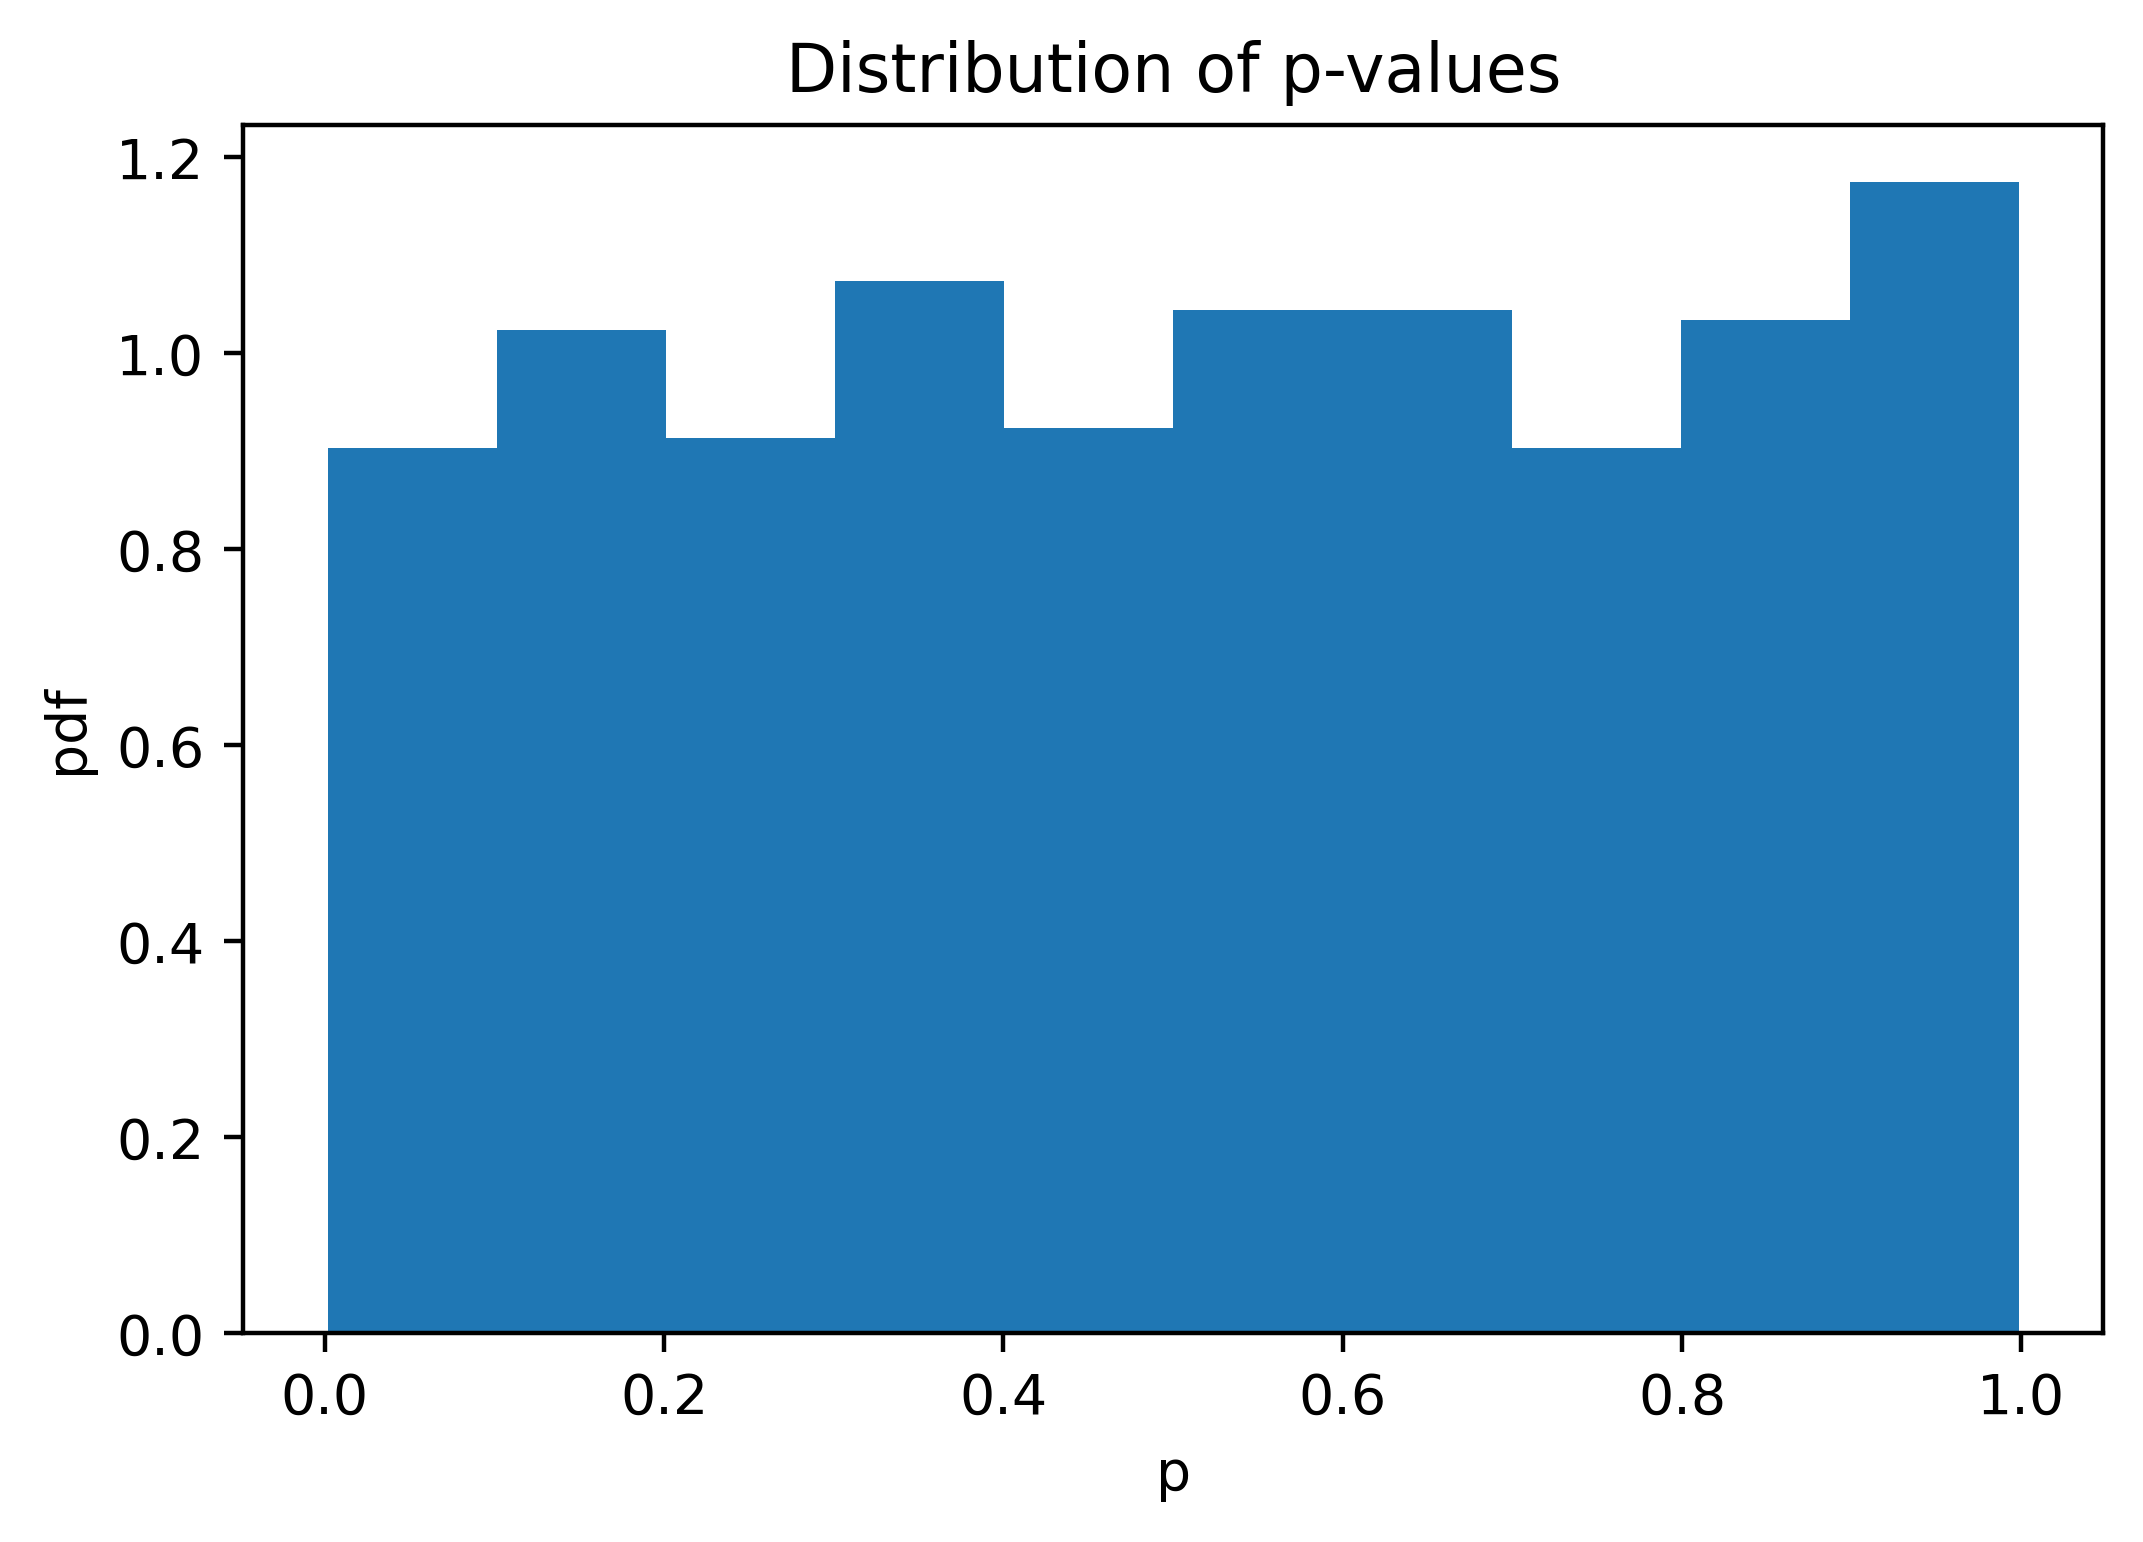

#### Test output (most suspect):

>Entropy = 7.999986 bits per byte.
>
>Optimum compression would reduce the size
>of this 10000000 byte file by 0 percent.
>
>Chi square distribution for 10000000 samples is 193.27, and randomly
>would exceed this value 99.85 percent of the times.
>
>Arithmetic mean value of data bytes is 127.5030 (127.5 = random).
>Monte Carlo value for Pi is 3.141056456 (error 0.02 percent).
>Serial correlation coefficient is 0.000419 (totally uncorrelated = 0.0).
>

#### Parameters:

* seeds: [ 8829629304313682070 12181343731379107045  5545480738808843982
 17861318715808359966  1071225022712323566  1723902107340350200
 16137223695166910423  4467432744161318206 10477371609111130745
  2900064080930514087 10140041744222213926  6620458716837912875
 15891881301901347194   612602429246162018 15716505805519407824
   380427800668139764  5959954804351967286  1694260100434849494
  5138150937271981825 15213528520724587368 15324287937484560491
 14204370172206476275  5048986593750400538 13011981313703500046
  1586482727239089422 18003698572678507587  7011652606770324130
 17598231625997004586 17311634680724284923 16523773585231239069
  8496422378442811231  1688858770880989823  9511081790213434386
 10339526358054307032 12623607026219155345  3058569423570654366
 17738407596588638263  2832523737994577778 16850389092658956663
 15635487541062677455  8524330109761776727 16693421186391102811
  2388199200158892046  3620545508178589493  2556379149670502024
  8549765605863885129  1645204458411418037 14308018725310393940
   780198974126104807 11765589904335951236  7056638323362197593
  3859804755578921072 11942864857334608786  3267037565343249260
  5795305767748781955 13129760088873048192 13780631002798345448
 10770678550835765410 10167655190583568390  6971751570311673109
 14926193130390676296  5292277666607705327 16461166215638835703
 18442898186940497655  8937994259614193785  1867213356995920221
 17259696695841919051 10230588983756649992  7633224225207584139
   908496132760235717  1873783649085788084  1969616962854519277
 10374568203781567296 13952916030235983268  5538635025818213015
 10188006796883235395  3887846938918686050  6754423453319696996
 17717102377420488067 11515678223973837628 12974089771172192775
 17695989307608685266 13392397797599384099 12385395400419669978
 10477906376774963638  5368150653712054778 10728764730225207137
 15542518312725772579 12754067612224991831  9068173031044733800
 13102356908519611330  2387043727145745390 15883657352300307094
 11516377206990358419 18001233127595268813 13770771893467002436
  9532907769839439908  8353455223729583737   183426870254441465
 12627935971247347865  7243257668974557340  4424946560097485533
 15019653656732653337  4555582710182430295 17272625044257768036
  5481880600910075036  6872236318623948488  3830503380793973736
   181593671480496515  7431992408162893422  6109754819942803742
  1901726752607484753 11195108076017838741 11576148672530388860
  1143750219303435920   319072568585411789   210966593583936452
 18075315171514128771 12182969050086406194  3239530317548272859
  6064712939797709598 13516650896728501586 18093215940689391195
  1327856640513221356  5912384972323190058  2009492212004870080
 14483331760538555878  4243740662722504814  8191565435380797009
 13375051184148573911 15402272639423071330  9973685879865482443
  5315562462229612596  1303078300452379838  1894753718197137669
 12526390034099701281  9964487512523799768  9612713114006092953
  8455228485396570171 15874443428178399425  3735874789879777040
   297647557619555765  9308330198752555780  2972832093577366877
 15040342165441342726  6203924665698293898  9287008042442934187
  8568966298662703533  7584548814474045216  5408825845169365227
 14889913221083004666 13541474376035801795 14074529893662815912
  1805028739249349313 12279509259435599227 13118008805266312444
 14860986685027776227   843663350526622595  8087798150855170502
  4616839160537291285  6185720606605330546 16031690905177302985
  1956166323731064974 12151312714189745567 17190794589505618949
  4509233688440920078 15808406293309444594 12982402829794958102
 11412418260273462269 15710699178222312806   341598950303457382
  4276916312810538061  5117490232510928293  1358195092765119816
  2581896603974772363  9662695252133806985 11921407565833049410
  2493501745374174915 13868130919841489970    77118082982193529
  1758439251918200598  4673502461470198355 13031177151606556614
 17986696432139105013  1869663013310009401   189811543490846509
 16239728845852068556  7608401878739583468 12212808054901784919
 16872102287005860433 13932378201433524975  7597777346362017867
 13981857049502201040   467304084183047832 12700679997953001296
  2161893896411670308 15823174517133869917 15358012904149133524
  1149414778327831836 11697072114356829714  4897405138476669690
 16755637661481378274  5707659591671802950 13401963296735879569
 17991482571246794928  4951947485539610144  7343728623276885255
 10790960683158821290  7840929582694525116 10414690654288368396
 17079372164437573888  1064522024154940655   605989819116436212
 17736889519871440803 10163123235022638641  8524454024943586832
    22054258795166665  1348100367722531540 18042806830918935067
  5741764568081023571 12598499878575327751  7785916964459768164
  3389101371434973383  1285499734533497289 14605197248550721309
 10571630925225553055 17781464774915319786  2661972302440736973
 13519287165729681676 10922511314740218243  3529003331492640170
  5925534570967300232  7853246746942735075   758908820055201955
 14881220450816603858  5571382215851315751 13642418014438455236
  9350693508735483863 10583265075017121944  6493792838682852506
   679147544244872182 12458264721414236298  5926742830057777260
  8294519058877438277   679963294138370446  5459809079557598570
  8281375381788327416  2063012510853325086 13835298631718685280
 12483512513713674966  3320032448130612326  9104361133902964908
  2340275319070510004  1394419637770477750 12965347707792931899
   685696887867979934  8787775178668133551 12406473467893988329
  9162745012228681731  7426204077620533995 15901939338064281842
  6280075663460866309 17851493236851428811  3398640355127494915
  1910447367086960961 15287015834489733477  6197779987778445655
  7661697773306154586  1227672150846261050  9723291211367737009
 17909386270823442439 16711248341138512920   220289362831375387
 14770861830299386888   957271145905053676 10935605479962849517
  8241102642565894982  6712381977203059815   124191208352364486
  6313988582631714894 10893314545019488966  3566942286674129120
  8690914057149610751  3277835413348463640 10642028142813602906
 15376343743781602684 18083209903747440776 12085330706799273973
 14383222495595769362  5924062938836715602  8601702675381788645
  7671363205761348706  3702692870104437191 17591882609907308690
 14208550108951287935  1720524108258650822 15311774299205766718
 11602574339320843283  9108621294614470254 13402095863822745201
  2409566231068588924 13937349423256006037   913630260462112083
  7098103764583804008  6121490887383649542  3004328115352035863
   362026975830598847  3330043406424841841 13669140232161945412
 15790328224157639319 15203465251280288754 10678410791608732512
 12614742334762741188  9508365670928290060 11907117948834377115
  5016370632138582039 15219375666164527616 15110620779077486044
 17655223003109155469  8081507720436719279  4291205153194750796
  6032215850138380906 11318119818482809217  5377945894981579819
   349965087223439486  7045133723284391200 16984669065021740713
  5298198652110189143  6254283865944361256  2824021935527324550
  3975377018755392685 13015276404084299102 11813037869338252486
 15984888747605070546  1563992840830303647   543579550183161618
 15583350262211020395 16659830131197986467  4840145847628407026
 17604804189475817140  5941603345464206146  8591018607527236508
 14260007478791518998  4464937869214915332 13718142222424375020
  1317015599651981181  2499792407636543919 14892787985233556061
 15568290767194213859  8822343601010677358  5656511780498163776
  3670896594694381128  4841059967660417642  3243347680182822459
  8952788025890440232 18038704235660286103  7751014976633309135
 15958251259856008341 14205243107022596945 15032165669026437386
  9313985043119617904  6963025210316309459  1548877754600449192
 10699075140327591082  6476722745405388619  2634120616687150443
 13777223076773838680  6385485202772859731  5804494400526594720
  6229190667850388218  2689061009236707789 12100104326952995817
 15660411579992633126 12409814249864423203  9548161565927160994
 17083223557475186028  4023178947537770101  4972797782095977568
  7522150998950282417 11772912350227895941 14397834318971442173
  9934935336342258815   223546542591473707  9592401989200082840
 16937605843117306530 13205983198828157747 13976965647369995015
 11915160458475892475  7608653461863408591  3406281189256205799
  8453372036840655364  4092193217441666194   640731260461633133
  1248837119865424566  6144361822198965919  1916092599189500789
  4640350717712546686   632666967507640195  1932732961993049169
  5478704950020052361  1332805658296380120  6222180012344235447
 17603237680900681675  3043453692464402158  3428558544201102327
  5192382848955717064  4375475299885402863 12466230022487880872
  9339198305478674462 12448708220145833837  8854534319013973758
 14606516036978512497 14246940320035791031 13808701459148281705
 16483490129935376375 10913274278393272453 11218691856759106733
 11360286890185972952 10717722810687729475  3999946300210508883
 17644709847431856672 15966034432988302536  1849330479885469405
  9011440597078269353 10428668030436923274  7297570016321880981
  2794914792808584849 15743401712435509739 16947012753763803008
 11785119828551874254  4266073089213977785  2378060032560429179
  4700095028175048258 17969951665363980393 14002241842030889583
 13479312905330651853  4792745443904640553 10173165428631563443
  4762717158781382465 14242162296900560247 10839655051570637425
  2838075910164470493  6523921660315362091  5045021956030697551
 17056616449252856735  4468211449835767023  2747755095981998414
 16847089758498585673   239904106624694981  8790110438413011271
  9238726734542493106  9785394362138590472   444127989584614900
   646137489831030545 17042638411328256355 14179127996263296084
  8410796859140433390  3102982536471556297  1092509403494922316
  5071768695601155484  7524061105199975436  7090359695298313278
 14450697686646430706   647570325459342113 16929595314557150790
 11779650026961705714  4718236533590664627  5988697687104462105
  9094340688646787808 16802461742282611088 16757740469862725336
  2976259345430168152   335663975338604196  4128775852533802138
  4497819785312780067 14445922572212424373 18229278294942762242
  3642599858066933326 12610124750327096188  8828185140728952756
 15973716915124415271 12741446894386858038  2353780333644545544
 17500807103258725175 15284617217004994984 11187897390632019927
  5645671827796103710  1980706005624467824 15488248501001411604
  1263374474784591981 13749570290258800993  9163343100630743414
   955243915127076351  9172031356335411176  6028536411260043175
  2008274712148446992 13899861054731135731  4738684003555372899
  6861741843644460420  7979696600937089590 14019710393226733701
 14719173895808186663 18192334328640698977  4764765684399959956
  8650771474587857411  2853480599735947685  7723814577537068331
 15211715213345686566  2471561760310115344  2901736179944278286
  9420972946115382597  9793233143641812341  8370937987576703495
 11784268093641018135  7798013447044933843 11212262770662559339
  7452063268094633586  6491528065850217080  1709319010628158686
 10871136492308636079 10509768682654828879  9525893907646434372
 17936719822438703954 10854200161291925256 15534430562493000137
 12732218781299211223  2756196486566056111 12556242302453680907
  1042547246438867408  2643811395111739078  7168408611095327711
 14328876770713717118 18100085809319927789  8968995576094254495
  6383774833496842644  2767446785490316359  3483123623874869307
 14024617731285731612 11974000485793170002  4707115796514911180
 16970942392438028211  6750452461762559961  3235349498147037531
  9733911952200279511  7942751304233239826 16131465919158203181
  2960338283753399653 16505100246799058218  2769633500997560627
  3343052896370131186  4019768480653451131  4694735796623145838
  3179216502647022703 15404254355640133753  1262005238060697009
 13597490450083989993  4409521468461527101 10758815558160896063
 17007085831686237377 16977422874642307965  3892799367111753001
 11657218719336300844  1066344715935657572  4307898948923458097
 16103610701116212196  3135096632197276764  8632262945542968506
  5179661997130402073  7258115305577266300  6139757885223259201
  7110138607699523598 15079599974998663463 14539919940619278966
 11436078740476256974  5897660751242839857  5138677508124890156
 18007279469913410335 17954718452445491852 17268654121698671906
 13591201378848859194 14832027117763179948 14018240881491333702
 12838551552994477833   261231726305489032  5322654285227028436
 10358167181693627944 18005304127581385248  7151825381798387879
    85699105968375649 18178760702110703128 12625876565029935651
 17077082023449555735  8142618312175293305  4460262017967912186
  4347446566488436025  3618032578488024980 15788813157562105400
  3342136032152560682 11901635853464844386 13609169366025680494
 16238387791848230058  3106648105456627613 17201226047702810104
  9241763830472352853 16718317420318379479 16155059481329994752
 15164991277558984950  6410080428759349748 16650181885260669180
 17298759088930652126 14448450503300981858   356587964239222284
 17144567189170597091 17376449284321114480 17775181728524617960
 13658818001972102325  8961415921421006305  9073842912196927987
  1896726410261395345  2628568598740356985  2251330751328959386
  6309359219547133071  5531070455081011076 10942884416886056127
  8461869077265906727 11703767126248278968 11274881609206573344
 10207989786357375974  6521959482586477194 15834351519603765174
  4672321560434954068  7215326252226702158  3187511857302359440
 17447517877220910578 15819199185867543493  3406913099340080076
 14762913278882667865  7650320610196735803 12934401555925507601
 16563410349908533460  8883737944782887556  8108560526491848754
 10554011543412871139 17539879104272649023   643647814202378484
 15907134362716647943 10205359281145660917  1205888049929714244
 17017723876693372263 16505090813362119755  3211279342796959563
 10257733115597592464 10690522948636156160  4075555748054371639
  6244913349012685311  5121680921791027100 14418896860289542701
  6241612430651179578 16016406886633148721   526711007830392578
 17397269098729857726 10687003918885423755 16603919682618832780
 10489030984221032036 14706190645822189158  6009114913366847645
 11933962988478157957 12895269425451533361 15347994187566093075
 15780728981641717047 10882775698182501793  4538031558343438335
  8841961440997197965  5497030858409036410  5663804669594420243
 11767421355200476759  1393545618058579931   140571096397183370
  9580272360339196079 10035318755913617714 16666821400319383701
   313779128801222264  6588386258907725262 17978962740846680962
  9758826615213366243  7826266404208985468  4647369961524811905
 13309509601893034000 18409904984032385576  7063797248739818732
  8878343352447618810 17151108056598476292  5594214698838671068
 14628650556419794270 12450357507681813461  4148075050004098332
  7557417628240401813 15774834332669828695 15525988375316924591
 11262435440223513194  7483642011696048950  8080657188145568000
 16112274436094018234  7193056333072387547  3591656749424729722
 13177928550852487063  9351194425568482465  7748014376540110823
  8721637805743166207  6993318185836933834 12197022436851408867
  5012230925976537496  5654181380697455868  6720637469948051927
  6115811234599129874 16705785712961029629  8098097906919089010
 11205522347052623295 18445885219570419959  9953980971880937106
   255231794540299572  6376198693776879898 17999667381469778163
  6647407071941178609 10187483004469749586 16279411316957735793
  7722304609872816069 10686097754705647988  9893895582325843279
  1124095257815315896  9021741896267947111  6516703511551262205
 17413892150552378343 14607347252510164763  8010618383011605968
  1604483483732123701 15608229235601898465  5826529163905991816
 14385477217864720966 13338397684364250385 13924181379727974725
  2922808694931020554  1777828869978657654  1834606988121465975
  2321808617234528213 11299630909566179110 11952436606284159890
   313362842954603942 15808719782697211916 14748118484728941368
  4570257334695530626  8014016910464012194 11264025400737030165
  9989824381821687682 11371181989872548299 17048535855379424867
 16328530991220620668 12986272512936887784  4464033326683459147
  1898386471804854756 18199648013022026209  9438290197911053599
 17573126356193240650  8007289930554846704  2223513803158253182
 11560110293677289193   472455068734480915 17373740970585819299
 14871701593365285017 16599687635351158733 17272587321795837070
 16434999091293085987  7471199225896134629 14840530550695280452
  4226202081992501269  2621177309007684556  4116745944911772930
  2682171888470015992  1821401664698424598 13346000851550695299
  9051609662457544783 11298354366164849528 14359566942145173259
 18191766414134562904  3639908774543107712  2706767367730847577
  1864581030568750358  6596772965892745950   125311973723624560
  5701994918740213912  2205374252141391075 15109038504209311297
  9420923413570067015 13909478421578885464 17848011113276565279
 11001693880672001423 15490243691310147921  7410367079335498054
  6538127556444058513 12598520975632022044  5905233626004728061
  2958772088094394153 14970651190412799924  9045715826303033153
  9292486190891722667 14195782437963493729  3808343855928200772
  9450853690729089446  4011761314477493096  1575003427075087236
  9152594165333254264 16381157058048001264 16943164190113409069
  6308908497010500124  9043678349920690116 14192445983174786303
  4862634867702495642  1168566539034929027  4028162396729523442
  7501510946091008396 11360620444414534118 16065526423315326678
 10094791748914448345 11384651978867764212  8622651382387086108
  4129810080109774869 13879876791011889878  9620155190054787816
  1416933722271692174    77261030061248947 12748147842683115544
   755032286758044880  6285237260178977398  8754757368666678420
 11620590461500931617 12744615480572013540  6871012566458495943
  6407114849874327419  1924709468570143797  7004867331382034445
  5679922127485888919  9854592775737054918  3620707550249453727
 10642027697336461162 14551817787374181471   313036060828752960
  6095628377573955538 12802294776573394449 13636631528188044182
  1067804768375152319  2905821935354691092 18431454734254142972
 16421897658914560240  8767799925835188657 15982846545632565096
 12357614042457993220  4465909650101218630  4637235487338034839
  1174840626251867109 11475977910587543995 12544077118541763147
 14601967516942525906 11350357054563866554 11037346754398711979
  9219515405898563135 12129448064287406424   469900205578988478
  5740906813116988281 13319279521634659291  8404847483293443131
  2541044111514097276 18107420018852811279  7270092556722169643
  5000707371977182706 13997570481524661104  5743608308383235146
  1755642979174840215 15719726887336966726  8914945613742077677
 11800844526502250072  3570789285947485812 14177258009465817760
 10902579704444431517  1754252917073222517 11758901602616578671
  6799832239300200304  2262799268141202921  8324117142844372911
 14488677853459841263 16094051924838332681 13410919754482059995
  5529083138980737451  2905307581370639389  2051637828432378486
 15142350176844183313  9829308844435848780 11155097411296338712
 16731046656248225084  5849843481572400708  1161640043111950548
  1413602953643937017 13213566485960253715 11997842196949589668
  4889068601313849490 17511560392645511012   716596584064254615
   508038558336095151  2149020455056499796  5216144626403711643
 13055824225167363809  5784760415962765636 17638804804201763574
 10686499411560881490 11820673153011420269 11225409598086083351
  2449185048604476447  8811098860761334866 13821877044789945262
  4046409037984032408  8883184090974576756  5765289946095328004
  5813783411209027790  7845696542617403917 12417038623248524435
 17097121119842449008  9402832758501489575 10363233332587595218
   748960444368859604  1206604589986260980  1676806067073659389
  3517144336372147212  1926642064708546988  9560668265259159969
  8769379649351258572  2862312738544447965 14735602457633519441
  7146553373958703744 17637701265617057970 12691152148485547553
   970932903107768130 17027762461839848703  1173541378613325442
 14197754768009975765  9427024415037147843  4242837288533296764
  1577892209778841921 10428847634152749284  6643891823766359593
 16063689004824175236 18371169434423525803 10133546972556819342
  1620716789850028983 10295417026198707267   423608556657888190
 11795562836091551346  2748325293846771481 13814020529483403903
 12748650652400060483  9199974512675971426 12609261675785860038
  5615049065624672041  7900747247266387289 11143676819025434677
  6207889478716576894 12821339579350837982 15759183725762401795
 13595356690777619368 16776336642860085780 15282938578198483372
  6208308031324041438  3041732666786069652 11672109114944119704
  5851416539061754525   131131310545808600 13750146010633349227
 14817465719414501899  9614193130544704026  1346348787027943364
 10463879641684088297  3987358415107728336  3165080297050515519
  3253469029482275998 12276023488796305632  4262690135517673441
  7044196174238146899 13197932342112141423  8116555944948614163
  7619010354679827843 11321717954652670867 15883418325488557924
  3213998762242954341 16385097916425959809  8470038729666318072
 11804389432808677736 14590088593469680895  3170949741183068213
  5903511719319333452  4639227692509145113  8280809008356291309
 12351652914973157688]
* limit: 10MB

In [5]:
for mode in ["Monolithic", "Independent", "IndependentSimulation", "IndependentSimulationNoDispersal"]:
    seeds = np.random.randint(0, np.iinfo("uint64").max, dtype="uint64", size=1000)
    
    test_randomness_ent(mode, seeds=seeds, limit='10MB')